# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем используемые библиотеки Python

In [87]:
# импортируем библиотеки pandas, matplotlib (пакет pyplot) и seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Прочитаем данные

Предварительное знакомство с данными показало, что разделителем в данных является табуляция ('\t'), будем использовать этот символ в качестве параметра 'sep' в функции чтения данных из файла.

In [88]:
# читаем датасет либо с локального ПК, а если не получится то из интернета
try:
    data = pd.read_csv('./datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('***', sep='\t')

#### Изучим общую информацию о полученном датафрейме

In [89]:
# посмотрим первые 5 строк датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [90]:
# ознакомимся с общей информацией о датафрейме, типах данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [91]:
# получим числовое описание данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Построим гистограммы по столбцам датафрейма

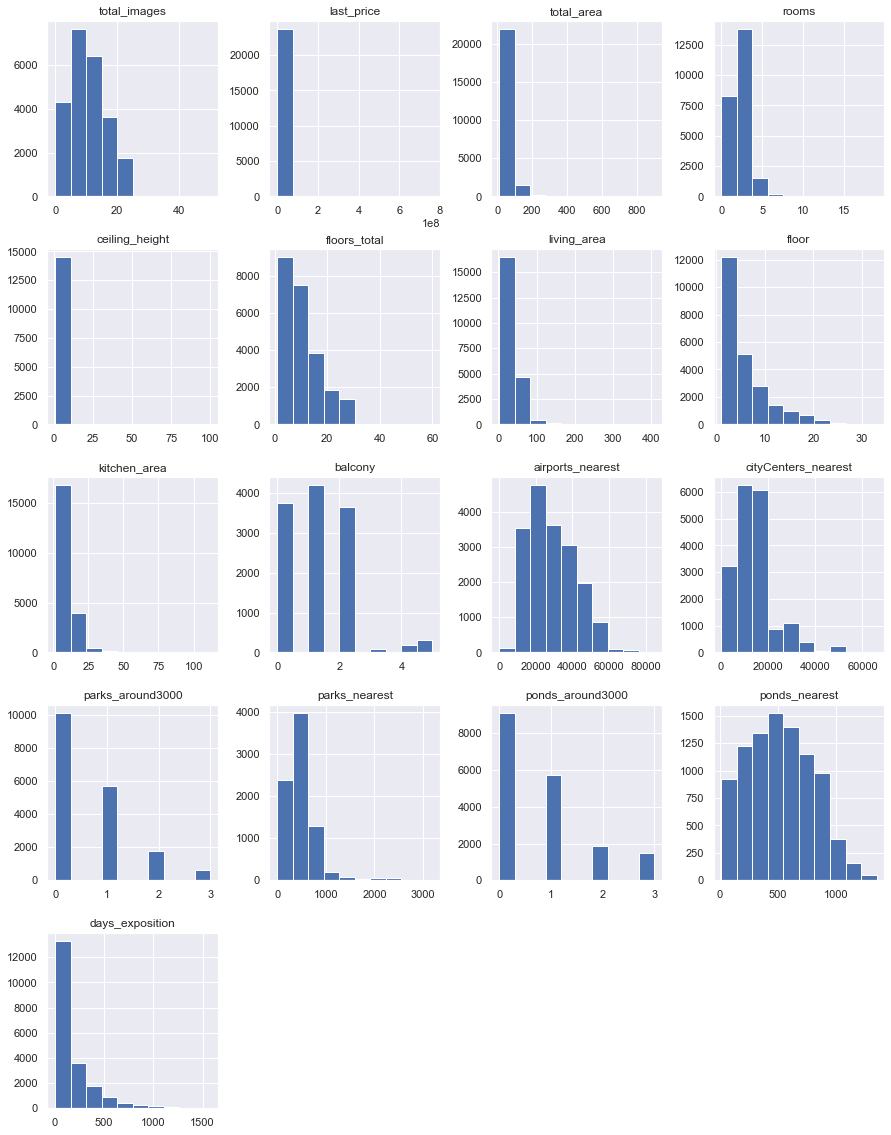

In [92]:
sns.set(style='darkgrid', rc = {'figure.figsize':(15,10)})
# построим гистограммы по всем столбцам датафрейма
data.hist(figsize=(15, 20))
plt.show()

#### Предварительные выводы

Прочитали датасет, изучили общую информацию: колонки, количество записей и типы данных, числовое описание данных, построили общие гистограммы по столбцам. Радует грамотное название колонок и наличие описания. Видно, что есть пропуски в данных, типы данных в некоторых столбцах не соответствуют самим данным. Обзор гистограмм и величина стандартного отклонения в столбцах 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area' и 'kitchen_area' говорят о явно выбивающихся значениях.

### Предобработка данных

#### Определим в каких столбцах есть пропуски

In [93]:
# посчитаем пропущенные значения в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В некоторых колонках ярко выражено огромное количество пропусков. Это колонки апартаменты ('is_apartment'), расстояние до ближайшего парка ('parks_nearest'), расстояние до ближайшего водоёма ('ponds_nearest'), число балконов ('balcony') и высота потолков ('ceiling_height'). Пропуски могут сильно искажать последующий анализ данных, поэтому важно их заполнить или удалить, там где возможно, конечно.

#### Заполним пропущенные значения

Так как у нас нет данных о типе строения, например, в кирпичных домах высота потолков как правило выше, чем в панельных, то в колонке высота потолков пропущенные значения лучше заполнить медианным значениям для этой колонки. Среднее лучше не использовать, потому что в числовом описании данных видно, что есть небольшое число явно выбивающихся данных, например максимальное и минимальное значение 100 и 1 соответственно.

In [94]:
# заменим пропущенные значения в колонке 'ceiling_height' на медианные
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Пропущенные значения в колонке 'floors_total' (всего этажей в доме) составляют всего 0,36% от общего количества записей и вряд ли окажут существенное влияние на дальнейшее исследование. Их можно заполнить значениями из колонки 'floor' (этаж), так как этажность дома не может быть меньше, чем этаж самой квартииры.

In [95]:
# заменим пропущенные значения в колонке 'floors_total' на значения из колонки 'floor'
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']

Пропуски в колонке 'living_area' (жилая площадь) заполним медианными значениями по каждому типу из столбца 'rooms' (количество комнат).

In [96]:
# для каждого количества комнат найдём медианное значение 'living_area' и заменим пропущенные значения
data['living_area'] = data['living_area'].fillna(data[['rooms', 'living_area']]
                                                 .groupby(['rooms'])['living_area']
                                                 .transform('median'))

Столбец 'is_apartment' (апартаменты) содержит огромное (88,29%) количество пропущенных значений, тип этой колонки булев, согласно описанию, но на самом деле 'object'. Посмотрим, что в ней есть полезного.

In [97]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Как видим, 50 апартаментов, 2725 не апартаментов и 20924 пропусков. Скорее всего, большинству людей заполнявших объявления было непонятно, что там указывать. Сам термин 'аппартаменты' трактуется везде по-разному. Колонка абсолютно бесполезна, оставим её как есть.

Пропуски в колонке 'kitchen_area' (площадь кухни) заполним медианными значениями по каждому типу из столбца 'rooms' (количество комнат), точно так же как это делали со столбцом 'living_area'.

In [98]:
# для каждого количества комнат найдём медианное значение 'kitchen_area' и заменим пропущенные значения
data['kitchen_area'] = data['kitchen_area'].fillna(data[['rooms', 'kitchen_area']]
                                                 .groupby(['rooms'])['kitchen_area']
                                                 .transform('median'))

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Заменим эти пропуски в столбце 'balcony' на 0.

In [99]:
# заменим пропущенные значения в колонке 'balcony' на 0
data.loc[data['balcony'].isna(), 'balcony'] = 0

По карте, всё что в радиусе 10 км от центра Санкт-Петербурга попадает в пределы КАД, а значит точно в пределах городских границ. Заменим пропущенные значения столбца 'locality_name' на 'Санкт-Петербург', если значение столбца 'cityCenters_nearest' (расстояние до центра города в метрах) меньше 10000. Оставшиеся 24 записи с пропусками заменим на значение 'не указано', так как не понятно что это за населённый пункт - все они далеко (или не указано расстояние вообще) от центра города, далеко от аэропорта, а водоёмов и парков очень много к ним не привяжешься.

In [100]:
# заменим все пропуски в столбце 'locality_name' на 'Санкт-Петербург' в пределах 10000 от центра
data.loc[(data['locality_name'].isna()) & 
         (data['cityCenters_nearest'] < 10000), 'locality_name'] = 'Санкт-Петербург'
# оставшиеся пропуски в столбце 'locality_name' заполним значением 'не указано'
data['locality_name'] = data['locality_name'].fillna('не указано')

Посмотрим что получилось, подведём предварительные итоги.

In [101]:
# посчитаем пропущенные значения в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Итак, пропуски были устранены полностью в столбцах 'ceiling_height', 'floors_total', 'living_area', 'balcony' и 'locality_name'. Частично в колонке 'kitchen_area', в нём сталось 197 пропусков. Посмотрим, что это за пропуски, определим причины их появления и подумаем как их можно заполнить.

In [102]:
# выведем первые 10 строк с пропущенными значениями в столбце 'kitchen_area'
data.loc[data['kitchen_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,18.00,7,NaN,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,2.65,18.0,18.00,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.00,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,2.65,27.0,18.00,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


Видно, что во всех 10 строках с пропусками количество комнат в столбце 'rooms' равно 0. Посмотрим сколько записей с количеством комнат равным 0 и пропущенными значениями в столбце 'kitchen_area'.

In [103]:
# выведем количество записей, в которых 0 комнат и попуски значений в площади кухни
len(data.loc[(data['rooms'] == 0) & data['kitchen_area'].isna()])

197

Записей ровно столько же, сколько и пропущенных значений в колонке 'kitchen_area'. Значит это квартиры-студии, в которых жилая зона объединена с кухней и можно оставшиеся пропуски заменить на 0 (отдельной же кухни нет).

In [104]:
# заменим оставшиеся пропуски в колонке 'kitchen_area' на 0
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = 0

Прежде, чем заполнять пропуски дальше, надо устранить явные дубликаты и неявные в столбце 'locality_name' (название населённого пункта).

#### Обработка явных дубликатов

Выведем на экран количество строк-дубликатов данных. Если они есть удалим их методом drop_duplicates().

In [105]:
# выведем количество дубликатов строк
data.duplicated().sum()

0

Как видим, дубликатов нет!

#### Обработка дубликатов в названии населенных пунктов

Посчитаем количество уникальных названий населённых пунктов и посмотрим на них для определения неявных дубликатов.

In [106]:
# выведем количество уникальных названий в столбце 'locality_name'
display(len(data['locality_name'].unique()))
# выведем все эти названия
data['locality_name'].unique()

365

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Многие названия отличаются буквами 'ё' и 'е', например, 'пос**ё**лок' и 'пос**е**лок'. Произведём замену всех букв 'ё' на 'е'.

In [107]:
# заменим все буквы 'ё' на 'е' в столбце 'locality_name'
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

Удалим все административные обозначения населённых пунктов, оставим только их названия. Посмотрим сколько останется уникальных названий.

In [108]:
# список названий, которые надо удалить из данных
replacement_list = [
    'садоводческое некоммерческое товарищество ',
    'садовое товарищество ',
    'при железнодорожной станции ',
    'поселок городского типа ',
    'коттеджный поселок ',
    'городской поселок ',
    'поселок ',
    'село ',
    'станции ',
    'деревня '    
]
# заменим все данные из этого списка в столбце 'locality_name' на пустое значение ''
data['locality_name'] = data['locality_name'].replace(replacement_list, '', regex=True)
# выведем количество уникальных названий в столбце 'locality_name'
display(len(data['locality_name'].unique()))

306

На 56 названий стало меньше. Теперь можно заняться остальными пропусками, так как неявные дубликаты не позволяли качественно заменить пропуски в оставшихся столбцах.

#### Заполняем пропуски в оставшихся столбцах

Заполним пропуски в колонках 'airports_nearest' (расстояние до ближайшего аэропорта) и 'cityCenters_nearest' (расстояние до центра города) медианными значениями по названию населённого пункта и посмотрим что получилось.

In [109]:
# для каждого населённого пункта найдём медианное значение 'airports_nearest' и заменим пропущенные значения
data['airports_nearest'] = data['airports_nearest'].fillna(
    data[['locality_name', 'airports_nearest']]
    .groupby(['locality_name'])['airports_nearest']
    .transform('median'))
# для каждого населённого пункта найдём медианное значение 'cityCenters_nearest' и заменим пропущенные значения
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(
    data[['locality_name', 'cityCenters_nearest']]
    .groupby(['locality_name'])['cityCenters_nearest']
    .transform('median'))
# посчитаем пропущенные значения в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4829
cityCenters_nearest      4829
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Всё ещё много пропусков, что характерно, их количество стало одинаковое для колонок 'airports_nearest' и 'cityCenters_nearest'. Выведем количество населённых пунктов, для которых не определены расстояния и посмотрим их список.

In [110]:
# выведем количество уникальных населённых пунктов, для которых не определено расстояние до центра города
display(len(data.loc[data['cityCenters_nearest'].isna(), 'locality_name'].unique()))
# посмотрим список этих населённых пунктов
data.loc[data['cityCenters_nearest'].isna(), 'locality_name'].unique()

278

array(['Янино-1', 'Сертолово', 'Кудрово', 'Коммунар', 'Красный Бор',
       'Гатчина', 'Федоровское', 'Выборг', 'Кировск', 'Новое Девяткино',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский',
       'Новая Ропша', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Сясьстрой', 'Старая',
       'Лесколово', 'Новый Свет', 'Сланцы', 'Путилово', 'Ивангород',
       'Шлиссельбург', 'Никольское', 'Сосновый Бор', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'Павлово', 'Оредеж', 'Копорье', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Бокситогорск', 'Лопухинка',
       'Пикалево', 'Терволово', 'Советский', 'Подпорожье', 'Петровское',
       'Токсово', 'Сельцо', 'Вырица', 'Кипень', 'Келози', 'Вартемяги',
       'Тельмана', 'Севастьяново', 'Большая Ижора', 'Агалатово',
       'Новогорелово', 'Лесо

Довольно-таки обширный список из 281 населённого пункта. Попробуем измерить линейкой рассстояние от нескольких из них до центра Санкт_Петербурга с помощью сервиса 'Яндекс карты'. Тихвин - 180 км, Янино-1 - 12,3 км, Кингисепп - 115 км, Бокситогорск - 200 км, Каменногорск - 130 км. Расстояния разные, как правило, очень большие - намного больше, чем максимальное расстояние в наших данных 65,97 км. Заполнять такие данные какими-то медианными или средними значениями смысла нет, потому что это исказит данные, вручную очень друдоёмкое мероприятие, а csv или excell файла с такими данными в интернете не нашлось. Запишем вместо пропусков значение в 100 км (100000 метров), и для качественных расчётов в дальнейшем будем отбрасывать эти данные.

In [111]:
# заменим оставшиеся пропуски в колонке 'airports_nearest' на 100000
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = 100000
# заменим оставшиеся пропуски в колонке 'cityCenters_nearest' на 100000
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = 100000

Заполним медианными значениями пропуски в столбцах 'parks_around3000' (число парков в радиусе 3 км), 'parks_nearest' (расстояние до ближайшего парка), 'ponds_around3000' (число водоёмов в радиусе 3 км) и 'ponds_nearest' (расстояние до ближайшего водоёма) по категориям из столбца 'locality_name', так как наличие парков и прудов будет одинаково для всех небольших населенных пунктов. Оставшиеся пропуски для количества парков и прудов в радиусе 3 км заменим на 10 и будем считать их выбивающимися значениями, так как диапазон реальных значений от 0 до 3. Пропущенные значения для расстояний до ближайших прудов и парков заменим на 10000 и так же будем отбрасывать при расчётах.

In [112]:
# для каждого населённого пункта найдём медианное значение 'parks_around3000' и заменим пропущенные значения
data['parks_around3000'] = data['parks_around3000'].fillna(
    data[['locality_name', 'parks_around3000']]
    .groupby(['locality_name'])['parks_around3000']
    .transform('median'))
# для каждого населённого пункта найдём медианное значение 'parks_nearest' и заменим пропущенные значения
data['parks_nearest'] = data['parks_nearest'].fillna(
    data[['locality_name', 'parks_nearest']]
    .groupby(['locality_name'])['parks_nearest']
    .transform('median'))
# для каждого населённого пункта найдём медианное значение 'ponds_around3000' и заменим пропущенные значения
data['ponds_around3000'] = data['ponds_around3000'].fillna(
    data[['locality_name', 'ponds_around3000']]
    .groupby(['locality_name'])['ponds_around3000']
    .transform('median'))
# для каждого населённого пункта найдём медианное значение 'ponds_nearest' и заменим пропущенные значения
data['ponds_nearest'] = data['ponds_nearest'].fillna(
    data[['locality_name', 'ponds_nearest']]
    .groupby(['locality_name'])['ponds_nearest']
    .transform('median'))
# заменим оставшиеся пропуски в 'parks_around3000' и 'ponds_around3000' на 10
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 10
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 10
# заменим оставшиеся пропуски в 'parks_nearest' и 'ponds_nearest' на 10000
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = 10000
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = 10000

Остался с необработанными пропусками только один столбец 'days_exposition' (сколько дней было размещено объявление). Проверим гипотезу - может быть, что у этих объявлений аномально высокая стоимость, объекты так и не были проданы и соответственно объявления остались "висеть", поэтому и появились пропуски. Создадим столбец 'exposition_unknown' булевого типа, куда поместим значения 'True' для пропущенных данных из столбца 'days_exposition' и отобразим эти данные на графике зависимости стоимости от площади разными цветами.

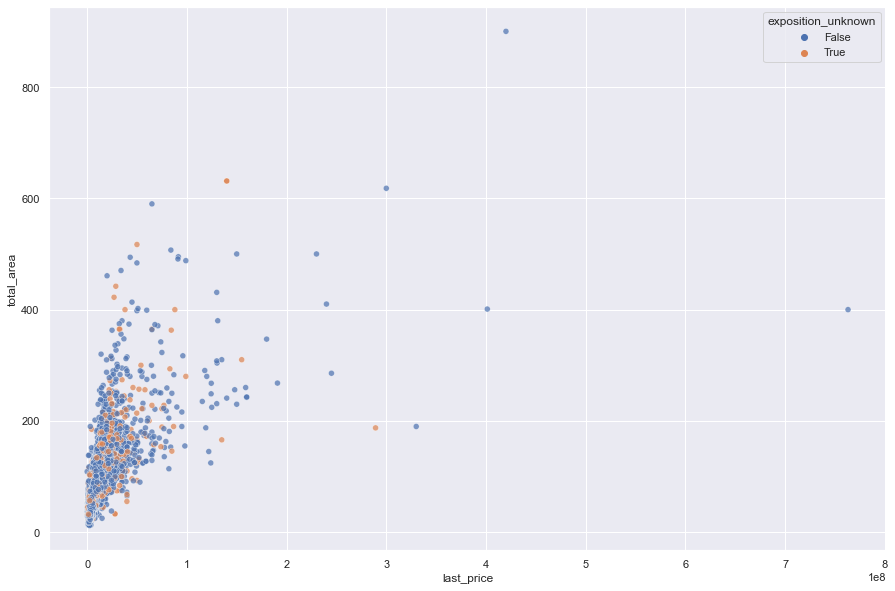

In [113]:
# создаём столбец 'exposition_unknown' с данными о пропусках в 'days_exposition'
data['exposition_unknown'] = data['days_exposition'].isna()
# выведем график зависимости цены от общей площади
sns.scatterplot(data=data, x='last_price', y='total_area', alpha=0.7, 
                hue='exposition_unknown')
plt.show()

Теория не подтвердилась - пропуски не где-то обособлено, а вперемешку со всеми значениями. К названию населённого пункта или площади их тоже не привяжешь, поэтому оставим эти пропуски как есть.

#### Рассмотрим типы данных в каждом столбце

Во время предварительного ознакомления с данными было видно, что некоторые столбцы имеют некоректный формат. Для удобного и коректного расчёта зависимостей, исследований и вычислений тип данных должен соответствовать самим данным. Рассмотрим подробнее столбцы с некоректным типом данных:
1. *'first_day_exposition'* - 'object', должен быть 'datetime64'
2. *'floors_total'* - 'float64', количество этажей в доме целое число 'int64'
3. *'is_apartment'* - 'object', должен быть булев тип 'bool'
4. *'balcony'* - 'float64', число балконов 'int64'
5. *'airports_nearest'* - 'float64', должно быть целое число 'int64'
6. *'cityCenters_nearest'* - 'float64', должно быть целое число 'int64'
7. *'parks_around3000'* - 'float64', должно быть целое число 'int64'
8. *'parks_nearest'* - 'float64', должно быть целое число 'int64'
9. *'ponds_around3000'* - 'float64', должно быть целое число 'int64'
10. *'ponds_nearest'* - 'float64', должно быть целое число 'int64'
11. *'days_exposition'* - 'float64', должно быть целое число 'int64'

#### Преобразование типа данных

С помощью методов для преобразования типов данных, изменим в выбранных столбцах тип данных. Столбец 'is_apartment' преобразовывать не будем, так как он нам не пригодится и тип данных 'object' в нём из-за пропущенных значений.

In [114]:
# преобразуем типы данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format='%Y-%m-%dT%H:%M:%S')
# создадим список названий столбцов для преобразования
list_columns = ['floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 
                'parks_around3000', 'parks_nearest', 'ponds_around3000', 
                'ponds_nearest']
# преобразование 'float64' в 'int64' произведём в цикле
for column in list_columns:
    data[column] = data[column].astype('int64', errors='ignore')
# столбец 'days_exposition' прийдётся обработать отдельно, предварительно округлив значения
data['days_exposition'] = data['days_exposition'].round().astype('Int64')
# проверим как прошло преобразование
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

None

Все колонки отлично преобразовались.

#### Устранение редких и выбивающихся значений

Проанализируем следующие столбцы на редкие и выбивающиеся значения:
1. *'last_price'*
2. *'total_area'*
3. *'rooms'*
4. *'ceiling_height'*
5. *'floors_total'*
6. *'living_area'*
7. *'kitchen_area'*

На графике зависимости цены от площади видно, что значения с ценами более 100 миллионов явно выбиваются из общей кучки, посчитаем сколько таких записей.

In [115]:
# количество записей с ценой выше 100 миллионов
(data['last_price'] > 100000000).sum()

37

Всего 37 записей. Удалим их и посмотрим какой вид приобретёт гистограмма распределения. 

In [116]:
# удаляем записи с ценой более 100 миллионов
data = data.loc[data['last_price'] < 100000000]

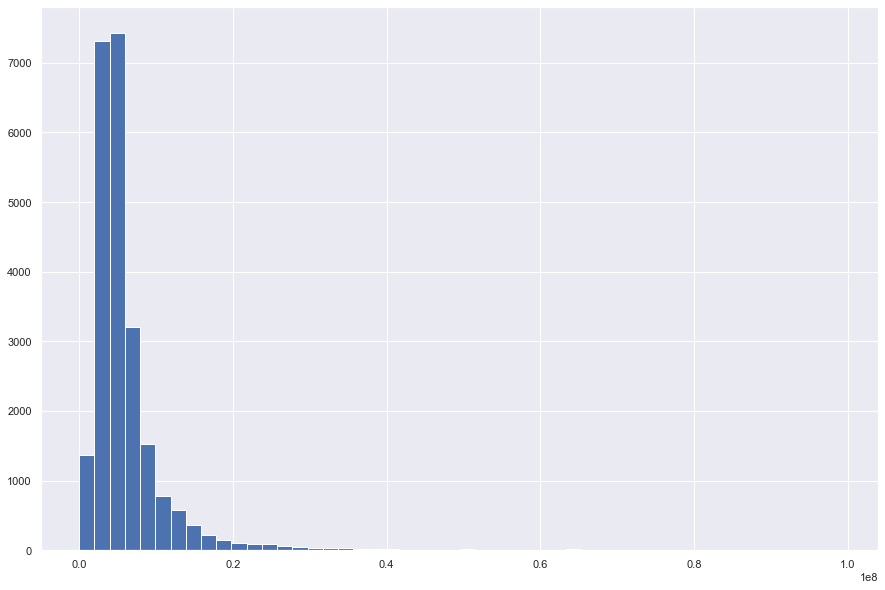

In [117]:
data['last_price'].hist(bins=50, figsize=(15, 10))
plt.show()

Видим всё ещё огромное количество значений, лежащих далеко за общей выборкой. Для дальнейшей обработки создадим функцию whisker(), которая для заданной колонки строит диаграмму размаха и считает количество значений, лежащих за верхней границей выборки.

In [118]:
# ----------------------------------------------------------------------------
# функция строит диаграмму размаха и считает сумму значений, лежащих за верхним пределом
# ----------------------------------------------------------------------------
def whisker(column):
    # выводим 'ящик с усами'
    data.boxplot(column=column)
    plt.show()
    # рассчитываем квартили
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    # вычисляем верхний предел
    max_lim = q3 + 1.5 * (q3 - q1)
    # вводим количество значений, лежащих за верхним пределом
    display((data[column] > max_lim).sum())
    return

Вызовем функцию whisker() для нашей колонки со стоимостью.

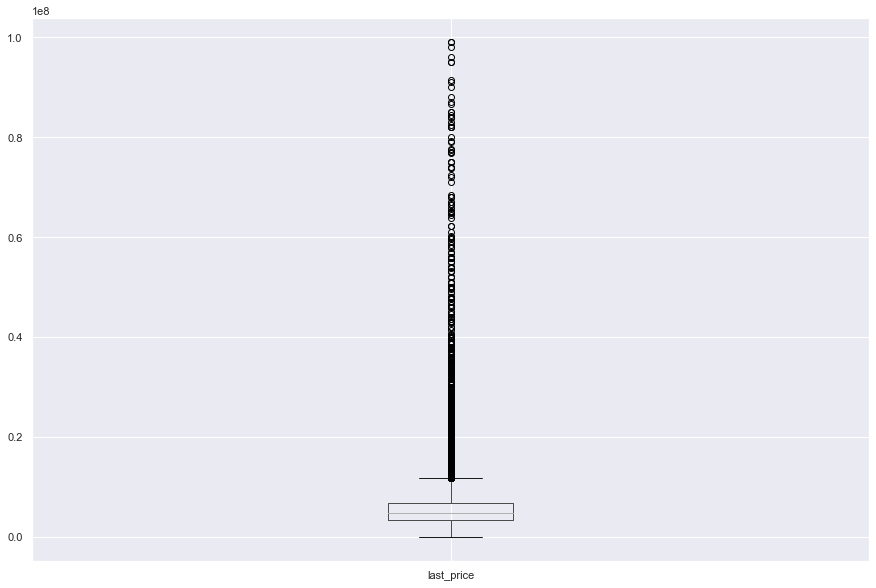

2049

In [119]:
# построим диаграму размаха и посчитаем еоличество записей за верхним пределом для колонки 'last_price'
whisker('last_price')

Всё ещё огромное количество выбросов - 2049 записей, но удалять такое количество особенно на этапе предобработки нецелесообразно. Аналогично проанализируем следующий столбец 'total_area'.

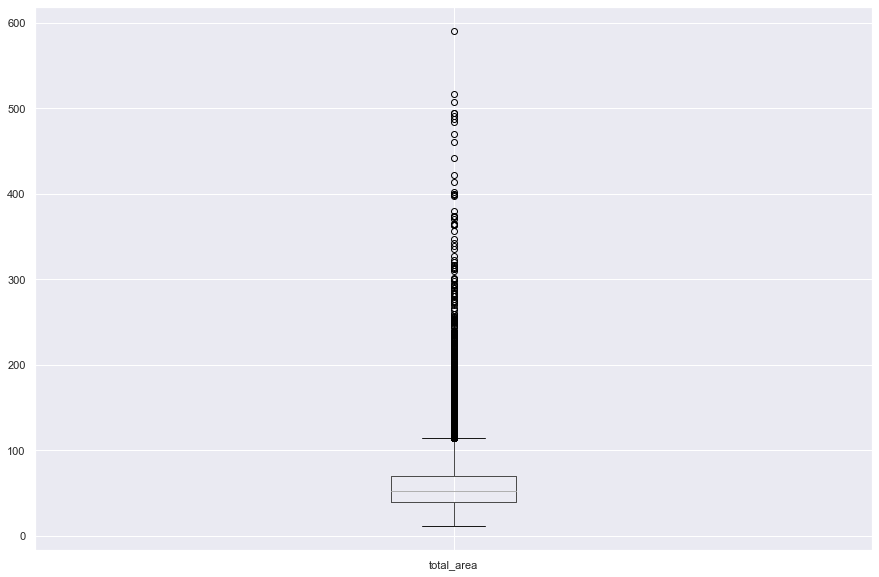

1237

In [120]:
# построим диаграму размаха и посчитаем количество записей за верхним пределом для колонки 'total_area'
whisker('total_area')

Тоже наблюдаем большое значение выбросов - 1237. на графике зависимости площади от цены видно что значения с площадью, больше 400 м2 явно выделяются на фоне остальных. Посчитаем сколько таких значений и если их будет немного, удалим эти записи и построим гистограмму распределения.

In [121]:
# количество записей с общей площадью больше 400 м2
(data['total_area'] > 400).sum()

14

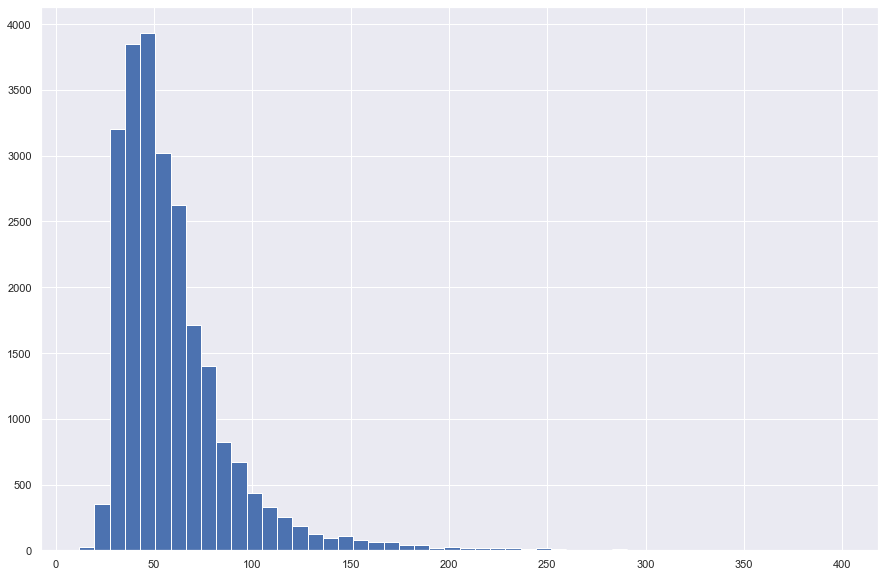

In [122]:
# удалим строки, где 'total_area' > 400
data = data.loc[data['total_area'] < 400]
# выведеи гистограмму распределения для столбца 'total_area'
data['total_area'].hist(bins=50, figsize=(15, 10))
plt.show()

Распределение по колонке 'total_area' выглядит уже получше - стало больше похоже на распределение Пуассона.

Рассмотрим столбец 'rooms' (число комнат) со значениями больше 10 включительно. 

In [123]:
data.loc[data['rooms'] >= 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,exposition_unknown
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,NaN,...,0,Санкт-Петербург,23606,3148,0,460,0,503,<NA>,True
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,NaN,...,0,Санкт-Петербург,38076,7950,0,460,2,435,418,False
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7,145.9,7,NaN,...,1,Санкт-Петербург,10726,12169,1,191,1,531,<NA>,True
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,NaN,...,0,Санкт-Петербург,21469,1015,1,686,2,66,813,False
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5,264.5,2,NaN,...,0,Санкт-Петербург,19497,3574,0,460,2,548,114,False
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5,161.4,2,NaN,...,0,Санкт-Петербург,24353,4921,1,368,0,503,11,False
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,NaN,...,1,Санкт-Петербург,23575,4142,1,516,0,503,1365,False
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6,189.4,6,NaN,...,1,Санкт-Петербург,26229,4932,3,316,1,227,77,False
20829,6,28659000.0,245.4,2016-03-31,14,2.65,4,168.3,2,NaN,...,0,Санкт-Петербург,21104,2054,3,541,2,118,95,False


Есть квартира с 19 комнатами, с 16 комнатами и жилой площадью 180 м2, значит каждая комната по 11,25 м2, как-то мало для такой 'элитной' квартиры, то же самое 14 комнат и 168,3 м2 жилой площади. Таких аномальных квартир всего 11, для чистоты данных удалим их, они не повлияют на нашу цель исследования.

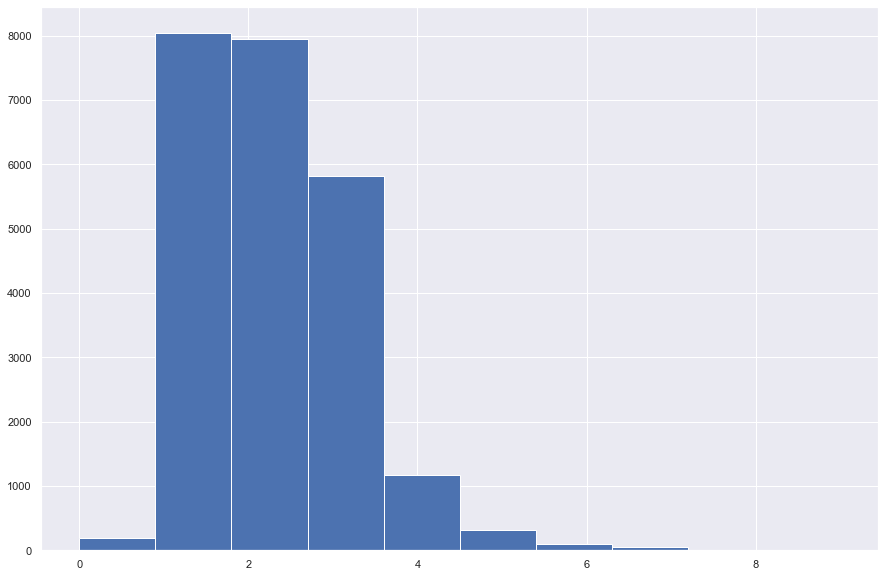

In [124]:
# удалим записи, в которых количество комнат больше 10
data = data.loc[data['rooms'] < 10]
# построим гистограмму распределения по количеству комнат
data['rooms'].hist(bins=10, figsize=(15, 10))
plt.show()

Намного лучше, распределиние очень похоже на распределение Пуассона, удалено всего 11 записей.

Далее рассмотрим столбец с высотой потолков. Сегодня минимальной нормой для потолков является высота 2.1 метра. Выведем строки со значеними, выше или равные 21 м.

In [125]:
data.loc[data['ceiling_height'] >= 21]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,exposition_unknown
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,2,Гатчина,100000,100000,10,10000,10,10000,259,False
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,NaN,...,0,Волхов,100000,100000,10,10000,10,10000,<NA>,True
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,NaN,...,1,Санкт-Петербург,12016,13256,1,658,1,331,181,False
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,NaN,...,2,Мурино,51553,21888,0,10000,2,133,28,False
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,0,Санкт-Петербург,29686,8389,3,397,1,578,7,False
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,NaN,...,2,Мины,100000,100000,10,10000,10,10000,540,False
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,NaN,...,2,Санкт-Петербург,28981,10912,1,305,0,503,267,False
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,NaN,...,5,Санкт-Петербург,18732,20444,0,460,3,80,38,False
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,NaN,...,0,Кронштадт,68923,50649,1,417,2,73,<NA>,True
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,NaN,...,0,Санкт-Петербург,11647,13581,0,460,0,503,<NA>,True


Наблюдаем явный выброс со значением в 100 метров и некоторое количество записей с высотой 32, 27 или 25 метров. Логично предположить, что это ошибка при вводе и настоящие значения 3.2, 3.7 и 2.5 соответственно. Преобразуем записи со значениями выше 21 и до 32 включительно в значения на порядок меньше. Записи со значениями более 5 метров и менее 2.1 метров заменим на медианные.

In [126]:
# уменьшим высоту потолков от 21 до 32 метров в 10 раз
data.loc[(data['ceiling_height'] >= 21) & 
         (data['ceiling_height'] <= 32), 'ceiling_height'] /= 10
# заменим медианными значениями потолки ниже 2.1 и выше 5 метров
data.loc[(data['ceiling_height'] < 2.1) | 
         (data['ceiling_height'] >= 5), 'ceiling_height'] = data['ceiling_height'].median()
# выведем результаты
data['ceiling_height'].describe()

count    23637.000000
mean         2.694923
std          0.211256
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

Потолок высотой 4.9 метра, наверное высоковат, но в таком городе как Санкт-Петербург может быть и есть.

Проанализируем аномалии в столбце 'floors_total' (всего этажей в доме), но сначала удалим все строки, где количество этажей больше 37, потому что самое высокое жилое здание в Санкт-Петербурге это жилой комплекс "Князь Александр Невский" высотой 126 метров и имеет 37 этажей.

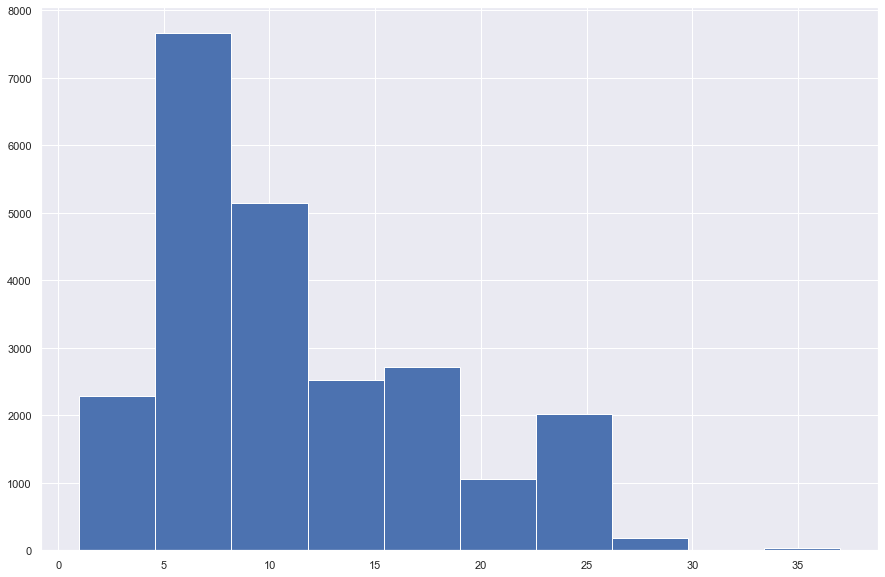

In [127]:
# удалим данные с домами выше 37 этажей
data = data.loc[data['floors_total'] <= 37]
# выведем гистограмму распределения
data['floors_total'].hist(bins=10, figsize=(15, 10))
plt.show()

С данными по этажам всё хорошо.

Переходим к столбцу жилая площадь. Выведем на экран записи с жилой площадью менее 10 м2.

In [128]:
# выведем записи, с жилой площадью меньше 10 м2
data.loc[data['living_area'] <= 10, ['total_area', 'rooms', 'living_area']]

,total_area,rooms,living_area
114,21.40,1,8.3
248,31.00,1,10.0
615,43.00,1,10.0
680,43.00,1,9.0
1326,52.00,2,9.0
1816,22.00,1,10.0
1947,24.00,1,10.0
2309,62.40,2,8.4
2654,42.80,1,10.0
2699,37.10,1,10.0


Наблюдаем 58 записей, допустим, 1-комнатная квартира или студия может быть 7 м2, при положенной минимальной норме 9 м2 на человека, но как такая квартира может быть 2-комнатной не понятно или что за 3-комнатная квартира с жилой площадью 3 м2 и общей 139 м2 тоже непонятно.
Удалим записи с квартирами, у которых жилая площадь меньше 7 м2 и квартиры у которых жилая площадь от 7 до 10 включительно и комнат больше 1.

In [129]:
# срежем квартиры с жилой площадью меньше 7 м2
data = data.loc[data['living_area'] >= 7]
# удалим строки с квартирами у которых жилая площадь от 7 до 10 включительно и комнат больше 1
data = data.loc[(data['living_area'] > 10) |
               ((data['living_area'] <= 10) &
               (data['rooms'] < 2))]

Посмотрим на "ящик с усами" и сколько значений жилой площади находится вне верхнего предела.

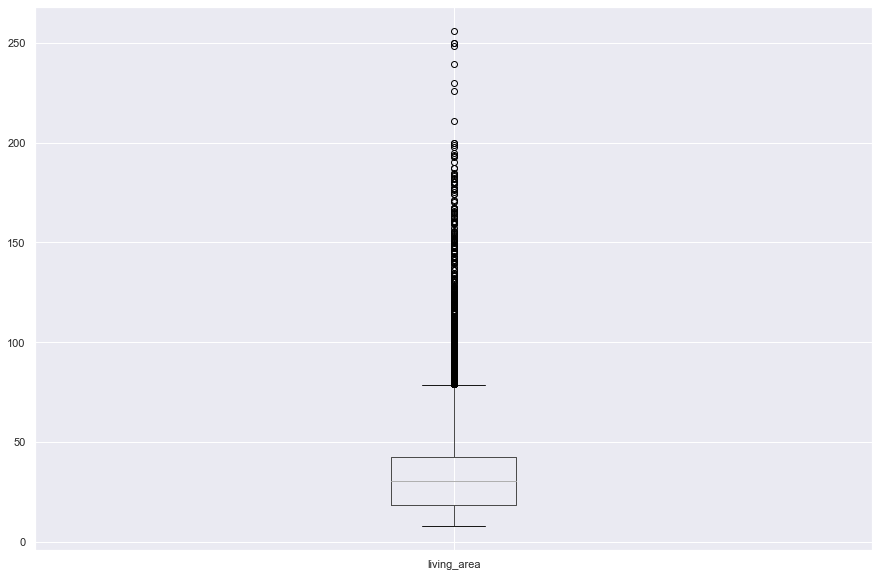

740

In [130]:
# построим диаграму размаха и посчитаем еоличество записей за верхним пределом для колонки 'total_area'
whisker('living_area')

740 строк, удалять такое количество потенциально полезных данных нецелесообразно, а вот значения выше 200 можно отбросить - они явно выбиваются от всех остальных, к тому же их всего 10, а значит не повлияет негативно на наши дальнейшие исследования.

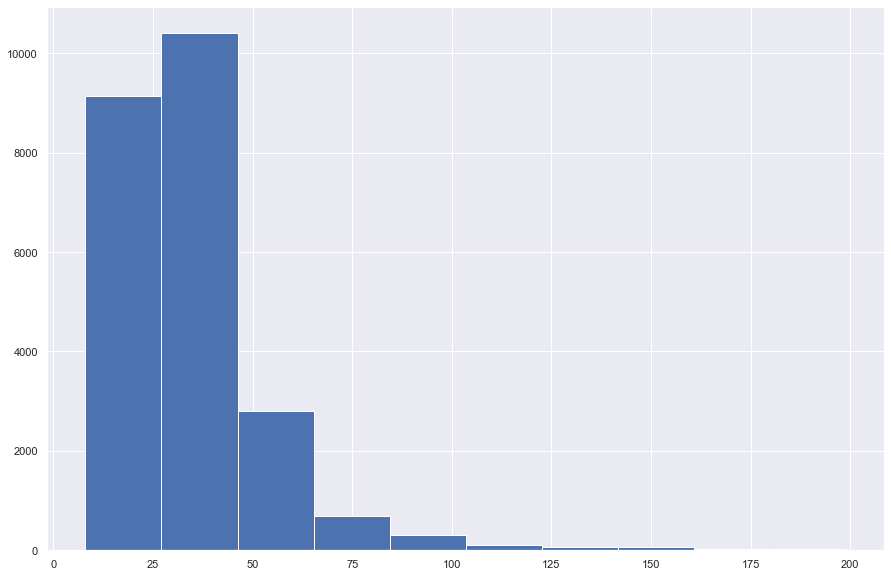

In [131]:
# оставим в датафрейме квартиры с жилой площадью меньше 200 м2
data = data.loc[data['living_area'] < 200]
# выведем гистограмму распределения
data['living_area'].hist(bins=10, figsize=(15, 10))
plt.show()

Итак, данные по жилой площади выглядят готовыми для дальнейшей работы с ними.

Расммотрим столбец 'kitchen_area' (площадь кухни), минимальные размеры нет смысла оценивать, так как ранее мы видели и даже сами внесли нулевые значения площади для квартир-студий, а вот выбивающиеся значения за верхние пределы надо оценить.

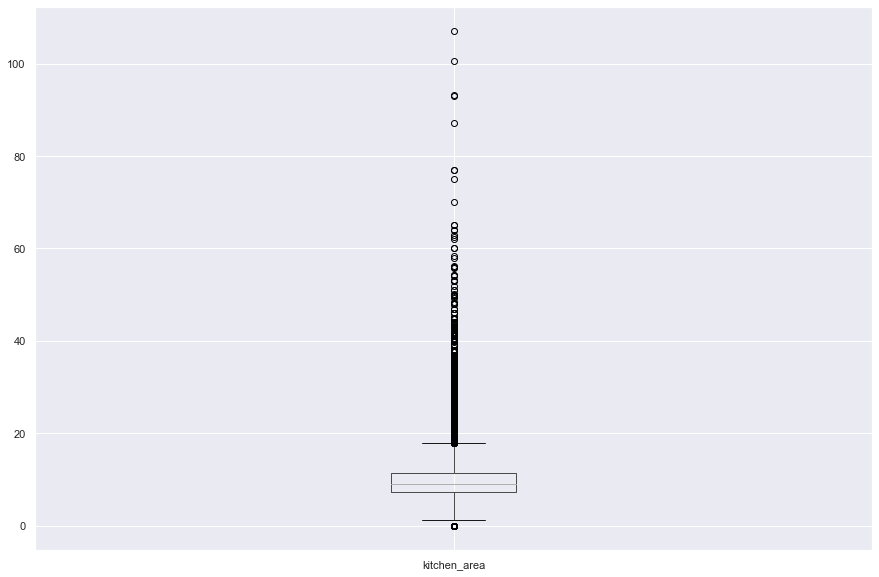

1477

In [132]:
# построим диаграму размаха и посчитаем еоличество записей за верхним пределом для колонки 'kitchen_area'
whisker('kitchen_area')

In [133]:
# посчитаем количество записей с площадью кухни более или равной 60 м2
(data['kitchen_area'] >= 60).sum()

18

Как видим, можно отбросить строки, в которых кухня больше 60 м2, таких записей будет 18. Затем оценим результат по гистограмме распределения.

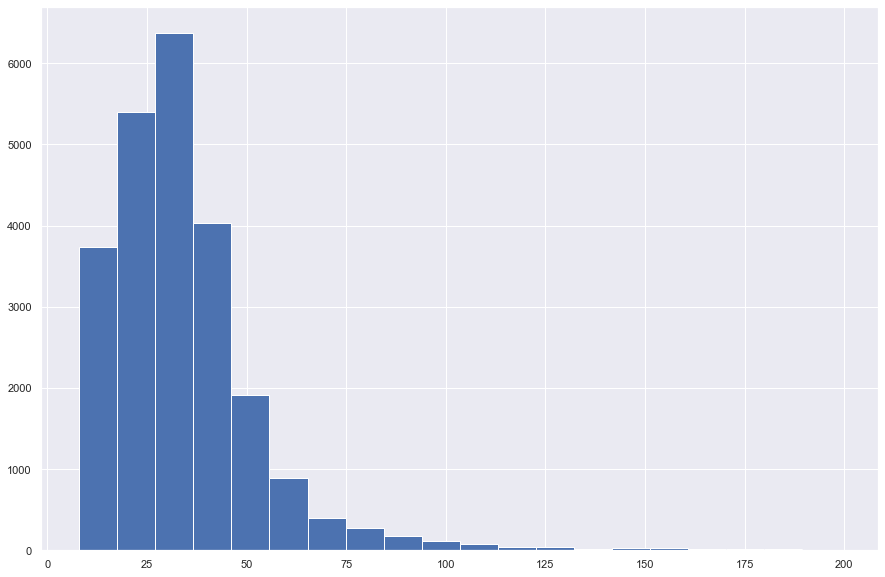

In [134]:
# сделаем срез по размеру кухни в 60 м2
data = data.loc[data['kitchen_area'] < 60]
# выведем гистограмму распределения
data['living_area'].hist(bins=20, figsize=(15, 10))
plt.show()

Данные по площади кухни выглядят готовыми для дальнейших исследований.

Посмотрим итоговую общую информацию по даннным, чтобы сделать выводы о проделанной работе, оценить не отрезали ли ценные данные.

In [135]:
# ознакомимся с общей информацией о датафрейме, типах данных
data.info()
# посчитаем пропущенные значения в столбцах
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23593 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23593 non-null  int64         
 1   last_price            23593 non-null  float64       
 2   total_area            23593 non-null  float64       
 3   first_day_exposition  23593 non-null  datetime64[ns]
 4   rooms                 23593 non-null  int64         
 5   ceiling_height        23593 non-null  float64       
 6   floors_total          23593 non-null  int64         
 7   living_area           23593 non-null  float64       
 8   floor                 23593 non-null  int64         
 9   is_apartment          2765 non-null   object        
 10  studio                23593 non-null  bool          
 11  open_plan             23593 non-null  bool          
 12  kitchen_area          23593 non-null  float64       
 13  balcony         

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20828
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3162
exposition_unknown          0
dtype: int64

#### Выводы по предобработке данных

В результате проделанной работы были устранены пропуски в большинстве данных, не удалось это сделать только в столбце 'days_exposition', типы данных приведены в соответствие этим данным, была проделана работа по устранению редких и выбивающихся значений. Было удалено **106 записей**, что составляет **0.45%** от исходных данных. **Данные готовы к дальнейшим исследованиям**.

### Посчитайте и добавьте в таблицу новые столбцы

* Цена одного квадратного метра

In [136]:
# добавим столбец цена за 1 м2
data['cost_square_meter'] = data['last_price'] / data['total_area']

* День недели публицации

In [137]:
# добавим столбец с номером дня недели
data['day_of_week'] = data['first_day_exposition'].dt.weekday

* Месяц публикации объявления

In [138]:
# добавим столбец с месяцем публикации
data['month_exposition'] = data['first_day_exposition'].dt.month

* Год публикации объявления

In [139]:
# добавим столбец с годом публикации
data['year_expostition'] = data['first_day_exposition'].dt.year

* Тип этажа квартиры

In [140]:
# ----------------------------------------------------------------------------
# функция для определения категорий этажа
# в качестве аргумента принимает строку из датафрейма
# возвращает категорию, к которой относится этаж
# ----------------------------------------------------------------------------
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [141]:
# добавим столбец с типом этажа квартиры заполнив его через функцию floor_type()
data['apartment_type'] = data.apply(floor_type, axis=1)

* Расстояние от центра города в километрах

In [142]:
# добавим столбец с расстоянием от центра в километрах и преобразуем его в целочисленное
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000) \
                                    .astype('int64', errors='ignore')

Для дальнейшего анализа данных в исходный датафрейм были добавлены следующие столбцы:
* *'cost_square_meter'*
* *'day_of_week'*
* *'month_exposition'*
* *'year_expostition'*
* *'floor_type'*
* *'cityCenters_nearest_km'*

### Проведите исследовательский анализ данных

#### Изучим параметры следующих объектов:

Прежде всего создадим функцию column_info(), которая будет выводить по интересующей нас колонке гистограмму распределения, количество значений в порядке убывания и числовое описание данных. Для анализа каждый раз будем её вызывать и делать выводы по результатам.

In [143]:
# ----------------------------------------------------------------------------
# функция вывода гистограммы распределения значений,
# количества значений в порядке убывания, числового описания данных
# в качестве аргументов принимает название столбца датафрейма, количество корзин для гистограммы,
# диапазон значений для гистограммы, наименование, название значений
# ----------------------------------------------------------------------------
def column_info(column, bins, range_x, title, label):
    # построим гистограмму распределения
    plt.hist(data[column], bins=bins, range=range_x)
    plt.title(title, fontsize=18)
    plt.xlabel(label, color='gray')
    plt.ylabel('Количество квартир', color='gray')
    plt.show()
    # посчитаем количество значений в порядке убвыния
    display(data[column].value_counts())
    # выведем числовое описание данных
    display(data[column].describe())
    return

* Общая площадь

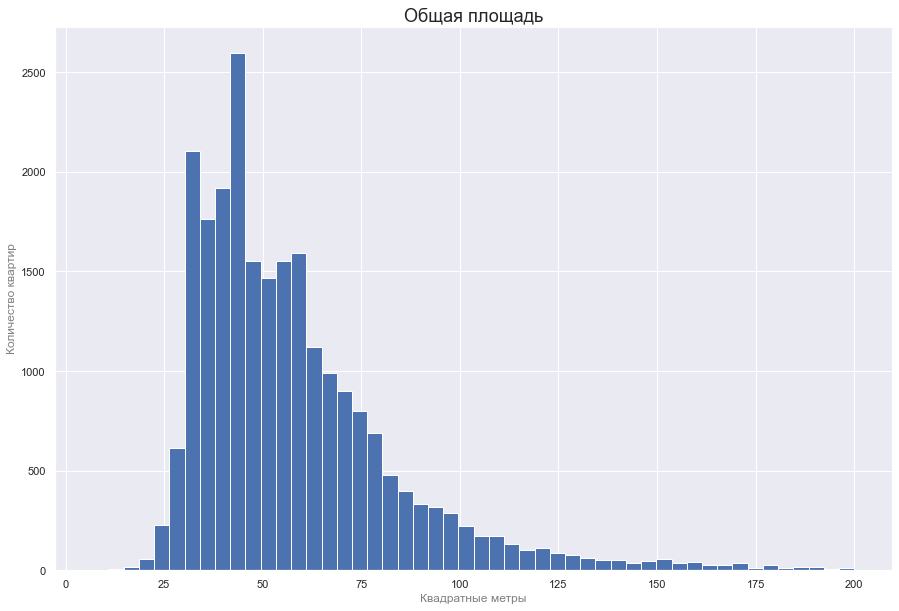

45.00     419
42.00     383
60.00     347
44.00     345
31.00     345
         ... 
126.30      1
55.64       1
56.16       1
109.10      1
76.75       1
Name: total_area, Length: 2123, dtype: int64

count    23593.000000
mean        59.380233
std         30.812100
min         12.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        399.000000
Name: total_area, dtype: float64

In [144]:
column_info('total_area', bins=50, range_x=(7, 200), 
            title='Общая площадь', label='Квадратные метры')

Наблюдаем классическое распределение Пуассона с пиком предложений квартир с общей площадью в 45 м2.

* Жилая площадь

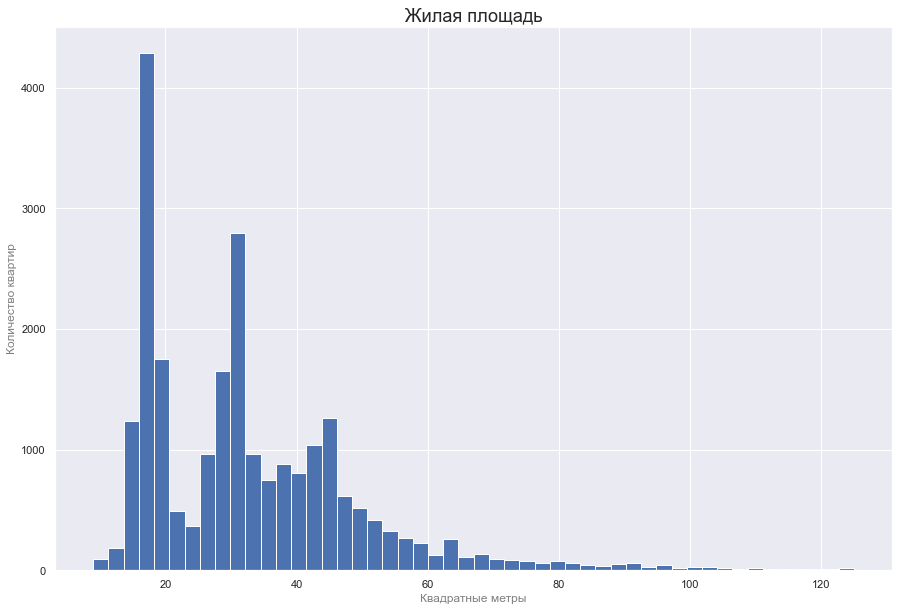

18.00     896
17.60     754
30.50     710
17.00     675
30.00     598
         ... 
36.07       1
50.81       1
152.00      1
36.81       1
42.55       1
Name: living_area, Length: 1732, dtype: int64

count    23593.000000
mean        33.831575
std         19.352322
min          8.000000
25%         18.400000
50%         30.300000
75%         42.500000
max        199.000000
Name: living_area, dtype: float64

In [145]:
column_info('living_area', bins=50, range_x=(9, 125), 
            title='Жилая площадь', label='Квадратные метры')

Распределение жилой площади, в отличие от общей, не так красиво подходит под распределение Пуассона. Самая распространённая жилая площадь продаваемых квартир 17 - 18 м2 и 30 м2, а вот между этими значениями наблюдается ощутимый "провал" в предложениях и всё, что меньше 30 м2, то количество предложений тоже заметно меньше. Предложения на квартиры с жилой площадью более 45 м2 встречаются заметно реже, ну а с площадью более 100 м2 - эксклюзив для избранных.

* Площадь кухни

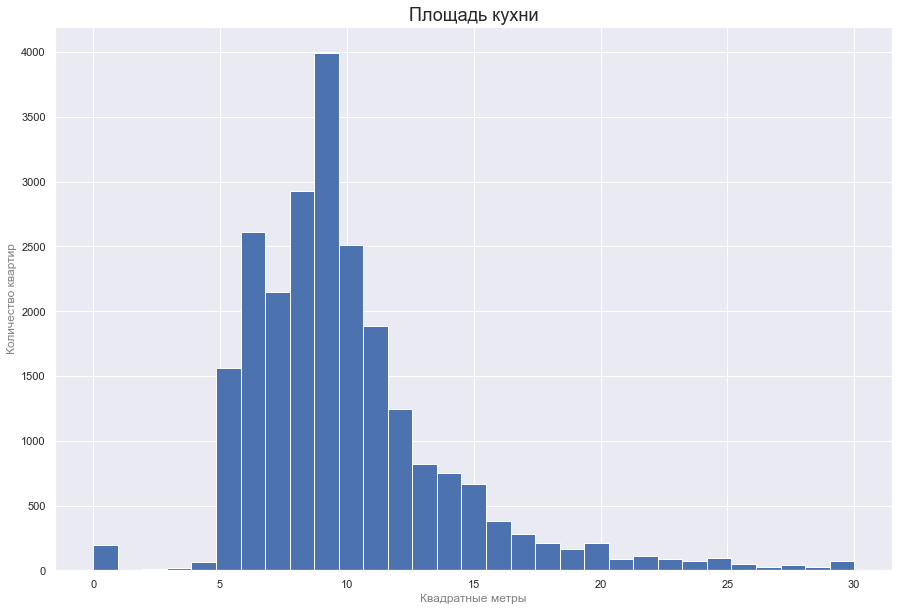

6.00     1299
10.00    1262
8.00     1110
9.00     1100
7.00     1062
         ... 
20.56       1
53.10       1
12.56       1
11.84       1
13.83       1
Name: kitchen_area, Length: 947, dtype: int64

count    23593.000000
mean        10.253874
std          5.148440
min          0.000000
25%          7.200000
50%          9.040000
75%         11.400000
max         58.400000
Name: kitchen_area, dtype: float64

In [146]:
column_info('kitchen_area', bins=31, range_x=(0, 30), 
            title='Площадь кухни', label='Квадратные метры')

Средняя площадь кухни в объявлениях 9 м2, наиболее распространённая 6 м2 (1299 записей) и 10 м2 (1262 записи). Распределение площади кухни - классическое распределение Пуассона, значения в 0 м2 - это квартиры-студии, в которых кухня совмещена с жилой площадью.

* Цена объекта

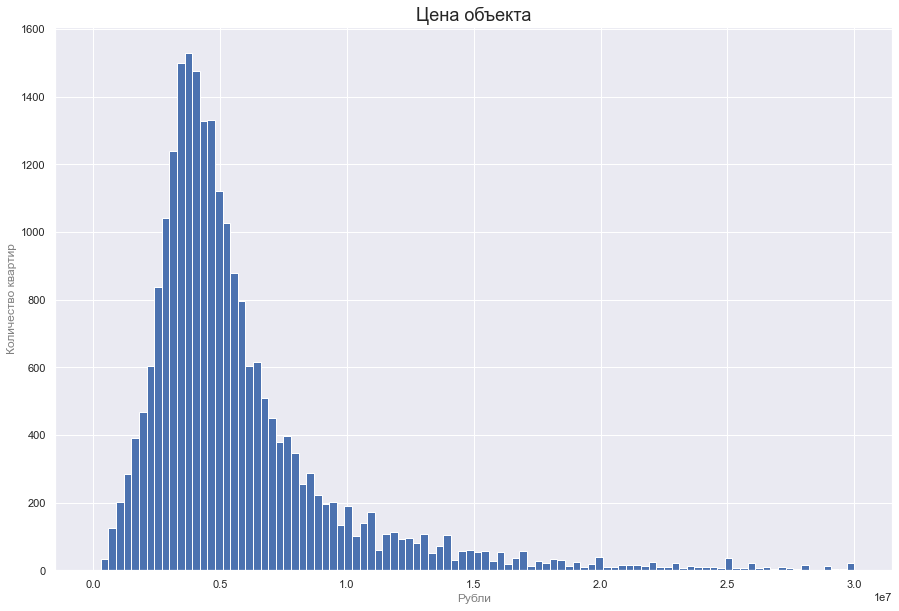

4500000.0     342
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     258
             ... 
7995000.0       1
7445866.0       1
5047000.0       1
1897000.0       1
11475000.0      1
Name: last_price, Length: 2924, dtype: int64

count    2.359300e+04
mean     6.161844e+06
std      6.029621e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.740000e+06
max      9.900000e+07
Name: last_price, dtype: float64

In [147]:
column_info('last_price', bins=100, range_x=(0, 30000000), 
            title='Цена объекта', label='Рубли')

Цена продаваемых квартир подчиняется классическому распределению Пуассона с пиком при цене 4,5 млн. рублей. В этом ценовом диапазоне лежат самые многочисленные предложения. Так же интересно выглядят всплески предложений по крупным "круглым" ценам - 20 млн. рублей, 25 млн. рублей и 30 млн. рублей, можно предположить, что хозяева элитной недвижимости любят "круглые" цифры.

* Количество комнат

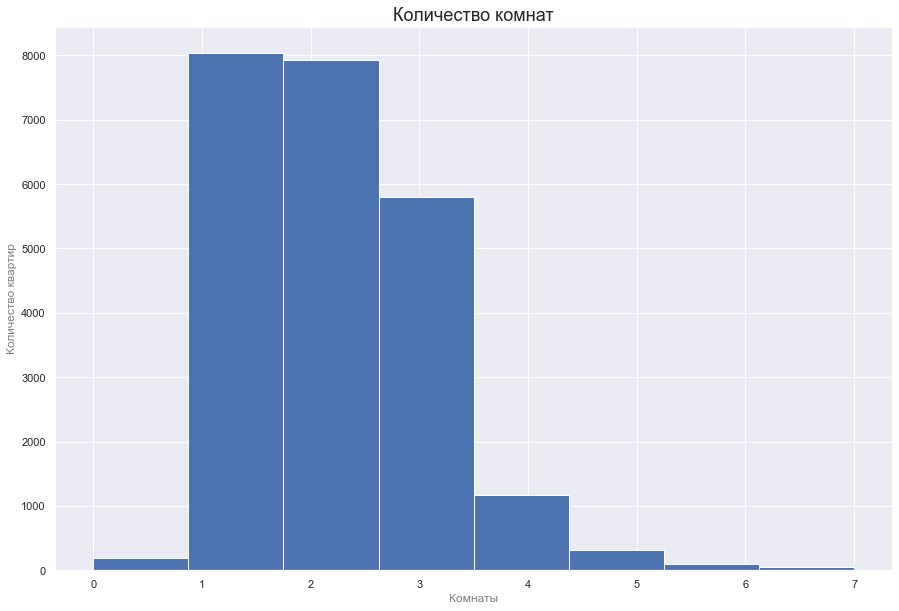

1    8042
2    7929
3    5799
4    1163
5     308
0     195
6      97
7      44
8      10
9       6
Name: rooms, dtype: int64

count    23593.000000
mean         2.056245
std          1.035082
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

In [148]:
column_info('rooms', bins=8, range_x=(0, 7), 
            title='Количество комнат', label='Комнаты')

Самые частоподаваемые квартиры - "однушки" (8042 объявления), низкая стоимость вхождения во владельца недвижимости не может не привлекать потенциальных покупателей, также много объявлений о продаже 2-комнатных квартир (7929 объявлений), 3-комнатных уже значительно меньше (5799 объявлений), а чем больше комнат, тем меньша предложений. Удивило, что студий, тоже очень мало - всего 195 объявлений.

* Высота потолков

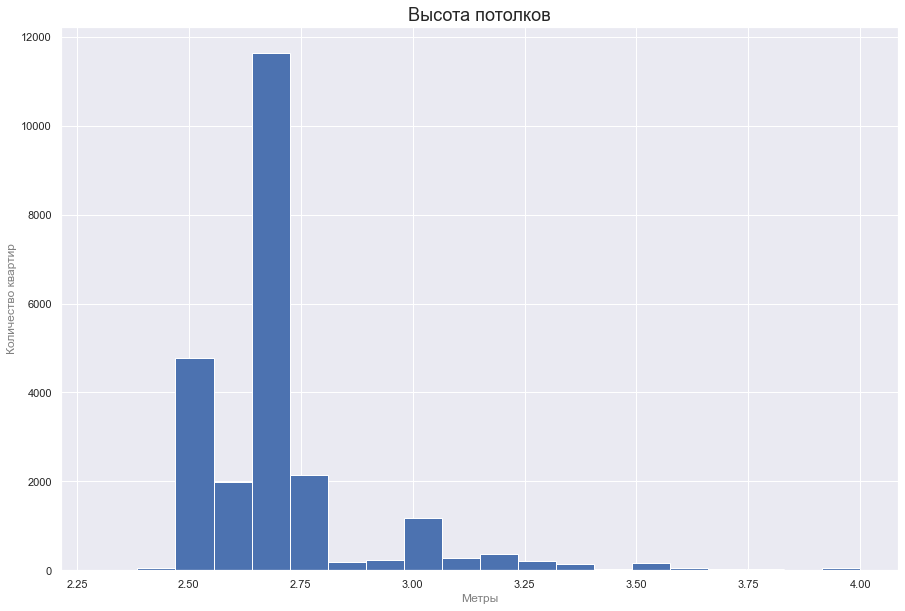

2.65    9865
2.50    3517
2.60    1645
2.70    1579
3.00    1103
        ... 
3.84       1
4.30       1
3.39       1
2.20       1
3.59       1
Name: ceiling_height, Length: 156, dtype: int64

count    23593.000000
mean         2.694395
std          0.210114
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

In [149]:
column_info('ceiling_height', bins=20, range_x=(2.3, 4), 
            title='Высота потолков', label='Метры')

Самая популярная высота потолков в Санкт-Петербурге 2.65 м. Жителям "хрущовок" в Сибири можно только позавидовать. Также много квартир с потолками в 2.5 м, что тоже очень даже неплохо. Потолки, ниже 2.5 м встречаются крайне редко и, скорее всего, не лучшим образом скажутся на цене, но это ещё надо проверить.

* Этаж квартиры

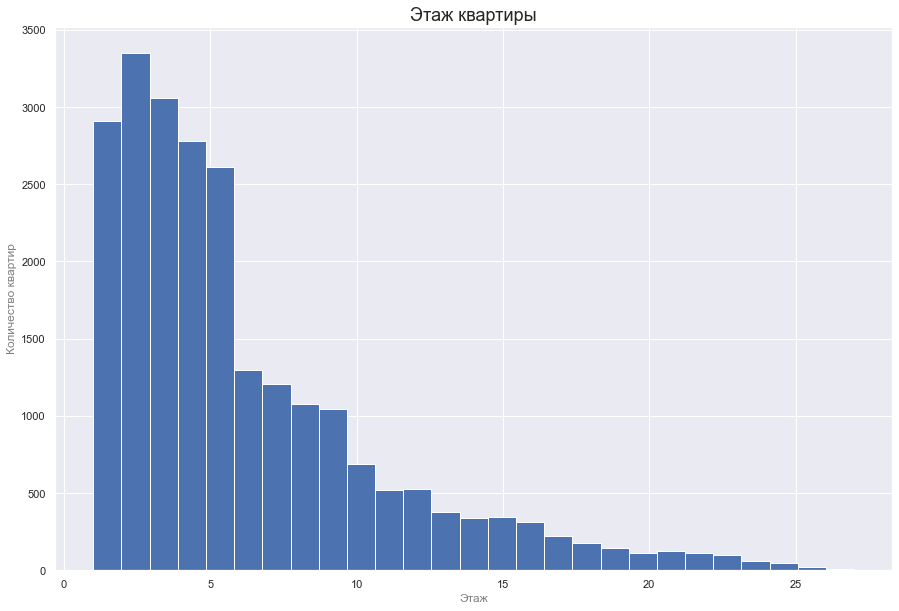

2     3353
3     3058
1     2911
4     2782
5     2611
6     1299
7     1205
8     1079
9     1047
10     686
12     526
11     522
13     379
15     342
14     337
16     314
17     225
18     176
19     147
21     124
22     112
20     110
23     100
24      63
25      45
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

count    23593.000000
mean         5.893231
std          4.886348
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [150]:
column_info('floor', bins=27, range_x=(1, 27), 
            title='Этаж квартиры', label='Этаж')

Максимально количество объявлений это квартиры на 2-м этаже, также можно выделить группу квартир с 1-го по 5-й этаж, она самая многочисленная, далее чем выше этаж, тем меньше объявлений, диаграмма распределения - классическое распределение Пуассона.

* Тип квартиры

другой       17292
последний     3390
первый        2911
Name: apartment_type, dtype: int64

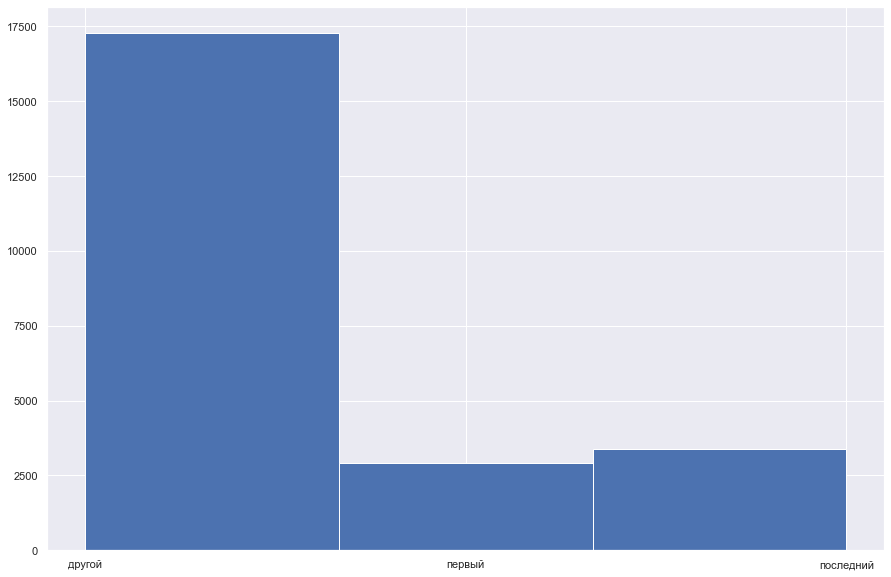

In [151]:
# выведем гистограмму распределения
data['apartment_type'].hist(bins=3, figsize=(15, 10))
# посчитаем количество значений в порядке убвыния
display(data['apartment_type'].value_counts())

Объявления о продаже квартир на первых этажах составляют 12.34% и на последних этажах 14.37% от общего числа объявлений.

* Общее количество этажей в доме

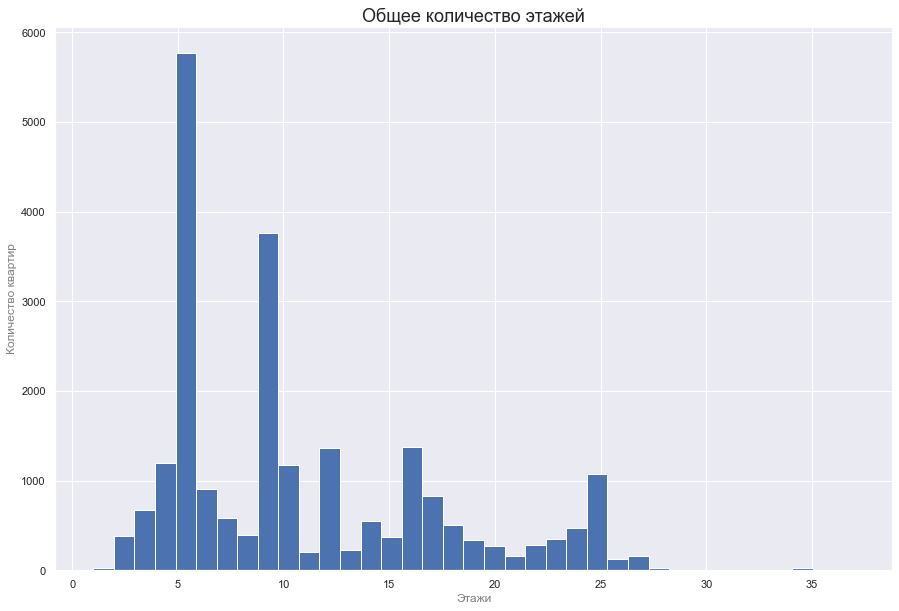

5     5773
9     3756
16    1376
12    1367
4     1197
10    1173
25    1072
6      905
17     833
3      667
7      582
14     555
18     508
24     470
8      392
2      383
15     367
23     353
19     342
22     286
20     270
13     230
11     206
27     164
21     162
26     124
1       28
35      24
28      21
36       3
34       1
29       1
33       1
37       1
Name: floors_total, dtype: int64

count    23593.000000
mean        10.680710
std          6.585915
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

In [152]:
column_info('floors_total', bins=37, range_x=(1, 37), 
            title='Общее количество этажей', label='Этажи')

Видим преобладющее количество типовых жилых зданий - 5-этажки, 9-этажки, 16-этажки, 12-этажки, есть в меньшем количестве 4-этажки, 10-этажки и даже 1072 объявления в домах с 25-ю этажами. Здания, выше 30-ти этажей уже эксклюзив. Также очень немного (28 штук) одноэтажных домов.

* Расстояние до ближайшего аэропорта

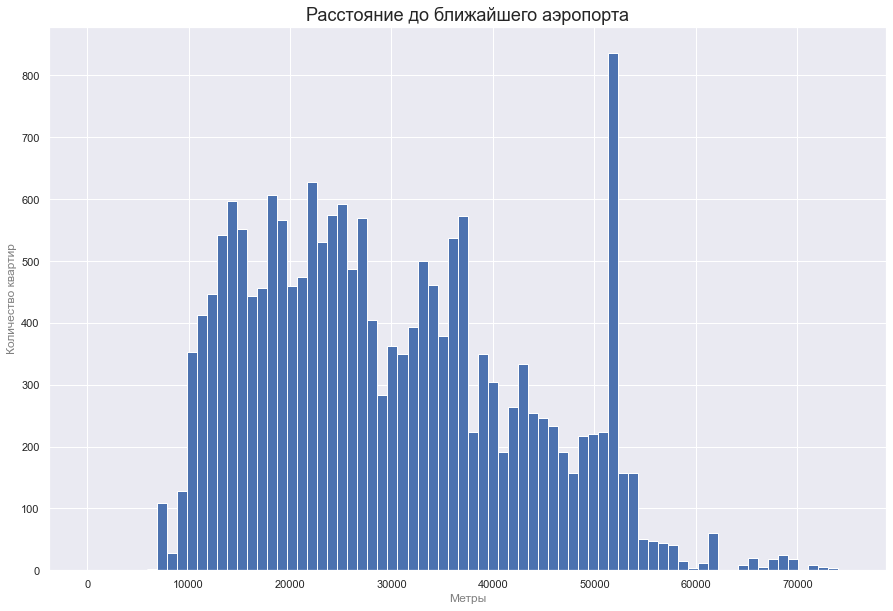

100000    4829
51553      589
26736       82
37434       61
21928       32
          ... 
23338        1
16282        1
12655        1
23322        1
24665        1
Name: airports_nearest, Length: 8242, dtype: int64

count     23593.000000
mean      43965.922731
std       30727.652467
min           0.000000
25%       21137.000000
50%       33400.000000
75%       51553.000000
max      100000.000000
Name: airports_nearest, dtype: float64

In [153]:
column_info('airports_nearest', bins=76, range_x=(0, 75000), 
            title='Расстояние до ближайшего аэропорта', label='Метры')

В ходе предобработки данных мы не смогли определить расстояние до ближайшего аэропорта для 4829 записей, именно для них указано расстояние 100000 метров, на гистрограмме они срезаны. Сильно выделяются на общем фоне 589 записей с расстоянием в 51553 метра, а так как это уже явно не сам город Санкт-Петербург, очень интересно что это за популярный населённый пункт. Попробуем определить его по карте. Наличие всего одного аэропорта Пулково облегчит нам задачу - начертим окружность с радиусом в 51,5 км от аэропорта. 

![](images/map_sp.png)


Ничего примечательного не видно. Попробуем сделать срез по значению 51553 в колонке 'airports_nearest'.

In [154]:
data.loc[data['airports_nearest'] == 51553, 'locality_name']

8        Мурино
38       Мурино
60       Мурино
66       Мурино
133      Мурино
          ...  
23442    Мурино
23461    Мурино
23472    Мурино
23539    Мурино
23638    Мурино
Name: locality_name, Length: 589, dtype: object

Аномально большое количество объявлений для города Мурино с населением всего 89'636 человек. С расстоянием до аэропорта тоже есть вопросы - расстояние по прямой почти 29 км, по дорогам 42,4 км, однако, в наших данных 51,5 км. Проверил на начальных данных это расстояние было указано в двух записях для "поселок Мурино" и в ходе предобработки данных заполнили этим же значением пропуски для "Мурино". Таким образом, никакого искажения данных в процессе предобработки не произошло, в наличии были только эти данные.

* Расстояние до центра города в метрах

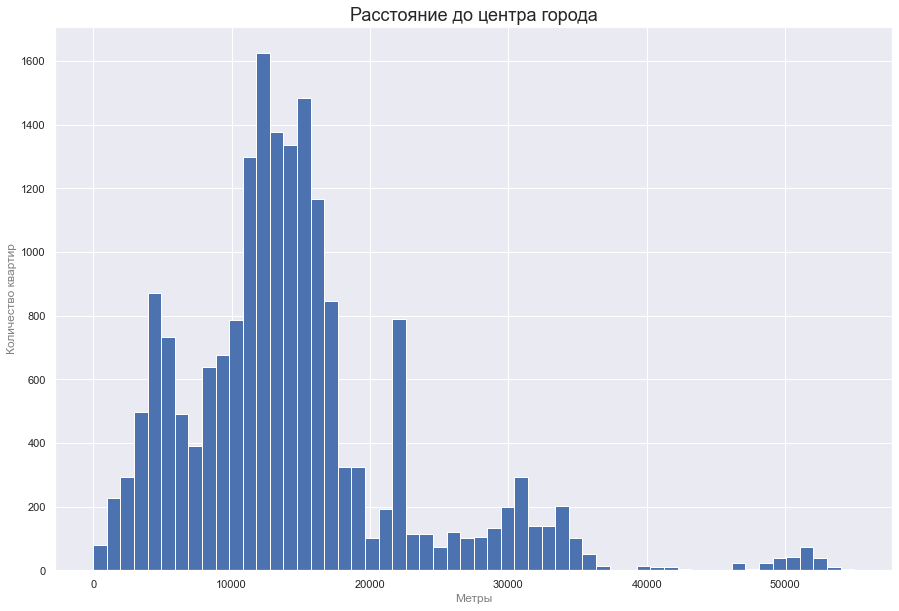

100000    4829
21888      589
12241       63
8460        61
20802       32
          ... 
5060         1
14369        1
3914         1
2647         1
6263         1
Name: cityCenters_nearest, Length: 7609, dtype: int64

count     23593.000000
mean      31998.040436
std       35337.643271
min         181.000000
25%       10977.000000
50%       14978.000000
75%       31102.000000
max      100000.000000
Name: cityCenters_nearest, dtype: float64

In [155]:
column_info('cityCenters_nearest', bins=56, range_x=(0, 55000), 
            title='Расстояние до центра города', label='Метры')

На гистограмме хорошо видно большое количество продающихся квартир в черте города (в пределах 10 км), ещё большее количество в ближайших пригородных населённых пунктов и аномально большое количество - 589, в городе Мурино (по некоторым данным это посёлок). 

* Расстояние до ближайшего парка

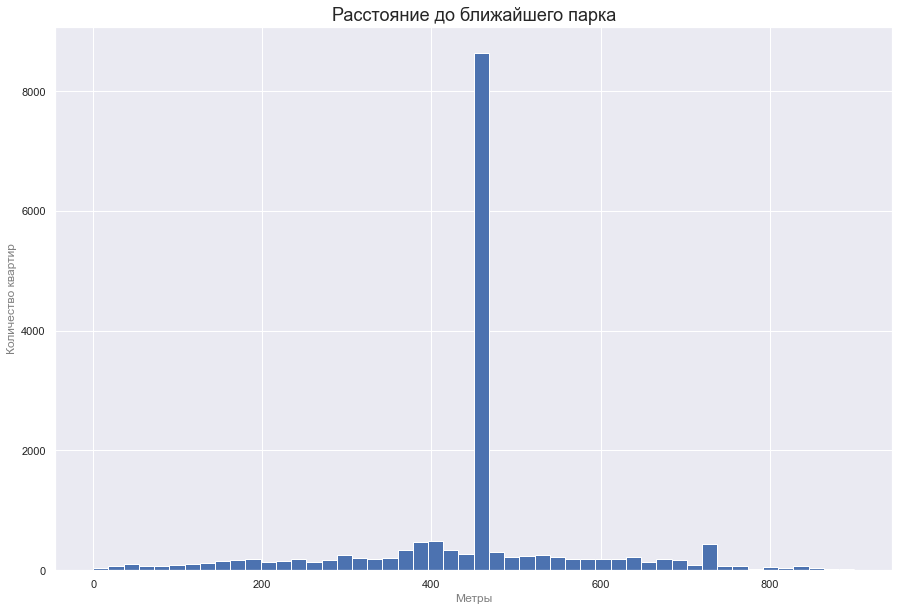

460      8437
10000    6020
733       324
393       218
399       165
         ... 
1586        1
1809        1
1049        1
1077        1
2984        1
Name: parks_nearest, Length: 993, dtype: int64

count    23593.000000
mean      2906.283262
std       4156.976329
min          1.000000
25%        460.000000
50%        460.000000
75%      10000.000000
max      10000.000000
Name: parks_nearest, dtype: float64

In [156]:
column_info('parks_nearest', bins=50, range_x=(0, 900), 
            title='Расстояние до ближайшего парка', label='Метры')

Подавляющее большинство квартир находится в предлах 500 метров от какого-нибудь парка. Городские архитекторы хорошо позаботились над расположением парковых зон.

* День недели публикации объявления

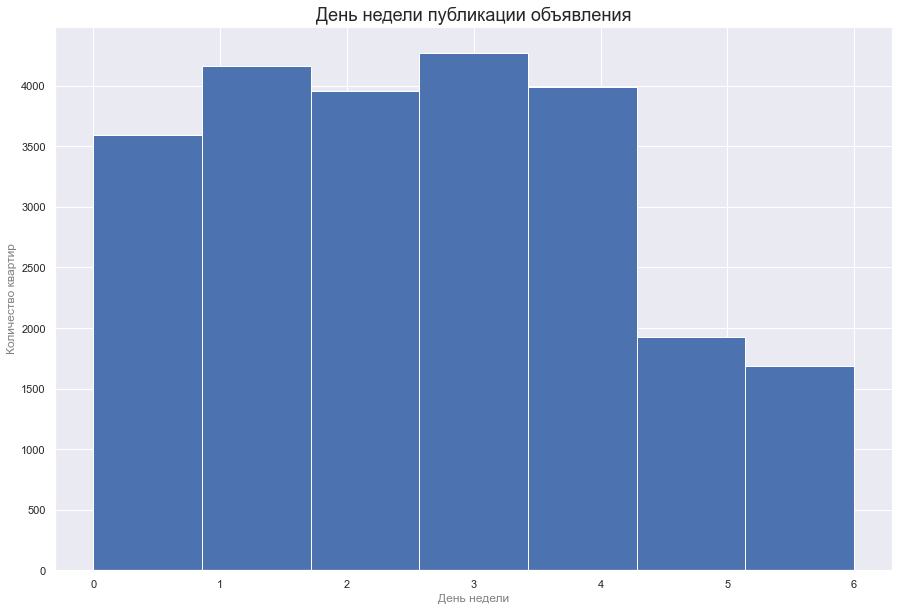

3    4274
1    4163
4    3987
2    3959
0    3596
5    1924
6    1690
Name: day_of_week, dtype: int64

count    23593.000000
mean         2.569025
std          1.788753
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64

In [157]:
column_info('day_of_week', bins=7, range_x=(0, 6), 
            title='День недели публикации объявления', label='День недели')

В выходные дни, люди явно предпочитают отдыхать, а не объявления печатать.

#### Изучим как быстро продавались квартиры

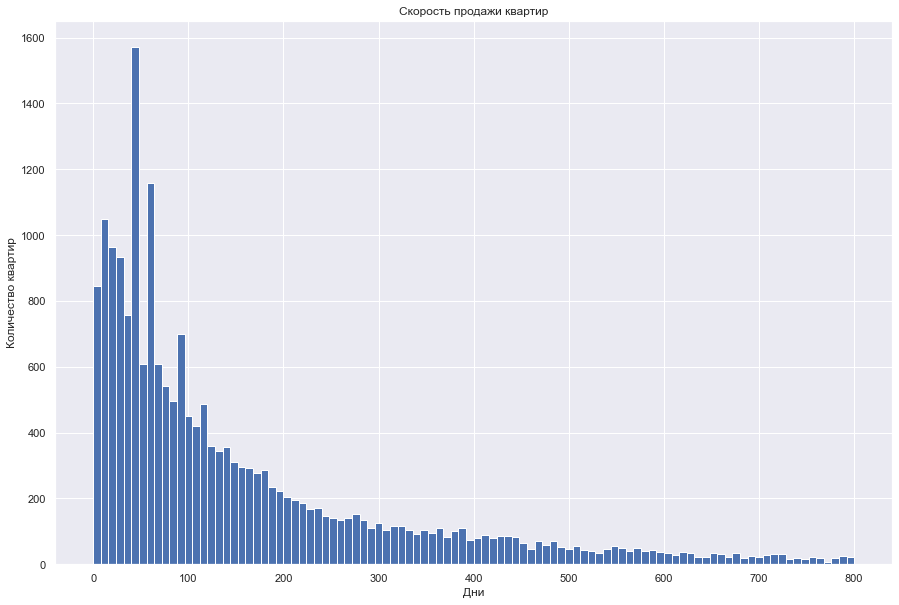

45      878
60      538
7       233
30      208
90      203
       ... 
1229      1
789       1
1074      1
1082      1
971       1
Name: days_exposition, Length: 1139, dtype: Int64

count    20431.000000
mean       180.459400
std        219.278094
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [158]:
# для вывода гистограммы надо срезать пропуски в данных
plt.hist(data.loc[data['exposition_unknown'] == False, 'days_exposition'], bins=100, range=(0,800))
plt.title('Скорость продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# посчитаем количество значений в порядке убвыния
display(data['days_exposition'].value_counts())
# получим числовое описание о днях размещения
display(data['days_exposition'].describe())

Медианное значение продажи квартир 95 дней, логично предположить, что квартиры, проданные ранее этого срока это быстрые продажи. Примечательно, что максимальное количество продаж (эти продажи даже выделяются на общем фоне) в количестве 878 произошло за 45 дней и 538 за 60 дней, т.е. очень быстро. К необычно долгим продажам можно отнести сделки, совершённые за третим квартилем (за порогом в 75% от совершённых сделок), т.е. продажи, которые длились больше 231 дня.

#### Изучим какие факторы больше всего влияют на общую стоимость объекта

Построим корреляционную тепловую карту.

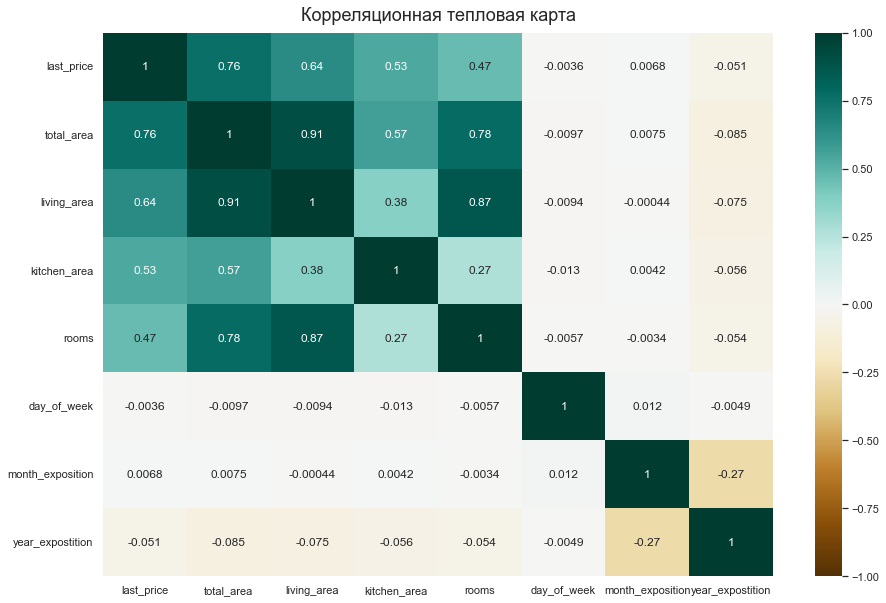

In [159]:
# создадим список из интересующих нас для анализа столбцов
corr_columns = ['last_price', 'total_area', 'living_area', 
                'kitchen_area', 'rooms', 'apartment_type', 
                'day_of_week', 'month_exposition', 'year_expostition']
# построим тепловую карту корреляций
heatmap = sns.heatmap(data[corr_columns].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Корреляционная тепловая карта', fontdict={'fontsize':18}, pad=12)
plt.show()

Видим, что на стоимость больше всего оказывает влияние общая площадь квартиры. Такие параметры как жилая площадь, площадь кухни и количество комнат, больше зависят от жилой площади и оказывают косвенное влияние на стоимость квартиры. Временные факторы никак не коррелируют со стоимостью. Тем не менее, рассмотрим на отдельных графиках зависиомсти от этих параметров.

* Общей площади

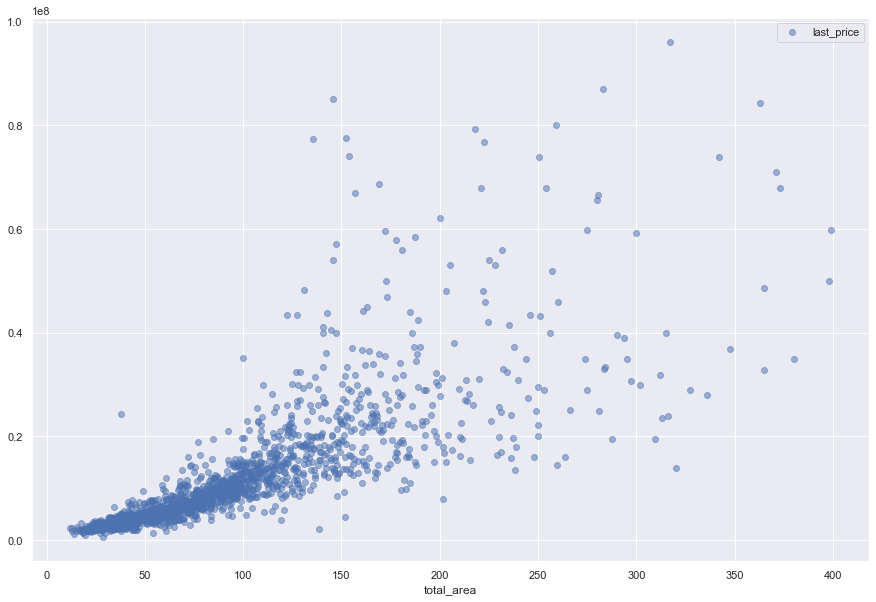

In [160]:
data.pivot_table(index='total_area', values=['last_price']).plot(style='o', alpha=0.5)
plt.show()

Видим тесную зависимость цены от площади, особенно на площадях до 200 м2 и стоимостью до 40 млн., дальше наблюдается разброс значений.

* Жилой площади

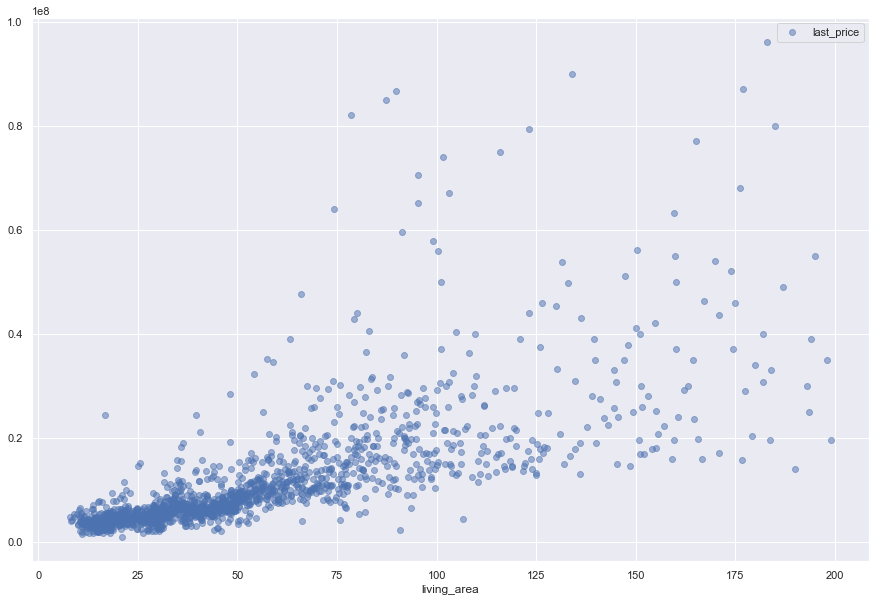

In [161]:
data.pivot_table(index='living_area', values=['last_price']).plot(style='o', alpha=0.5)
plt.show()

Тоже есть определённая зависимость до стоимости в 40 млн.

* Площади кухни

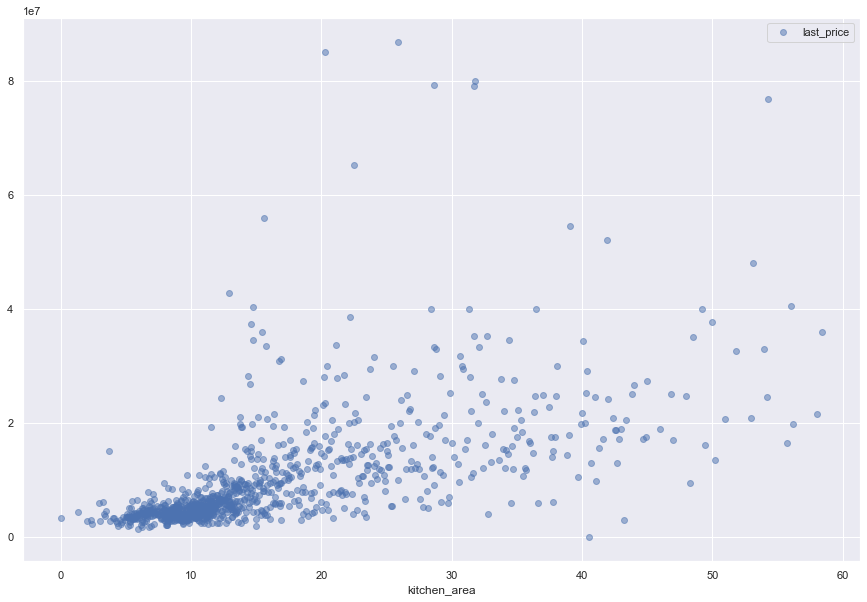

In [162]:
data.pivot_table(index='kitchen_area', values=['last_price']).plot(style='o', alpha=0.5)
plt.show()

Площадь кухни также оказывает некоторое влияние на стоимость.

* Количества комнат

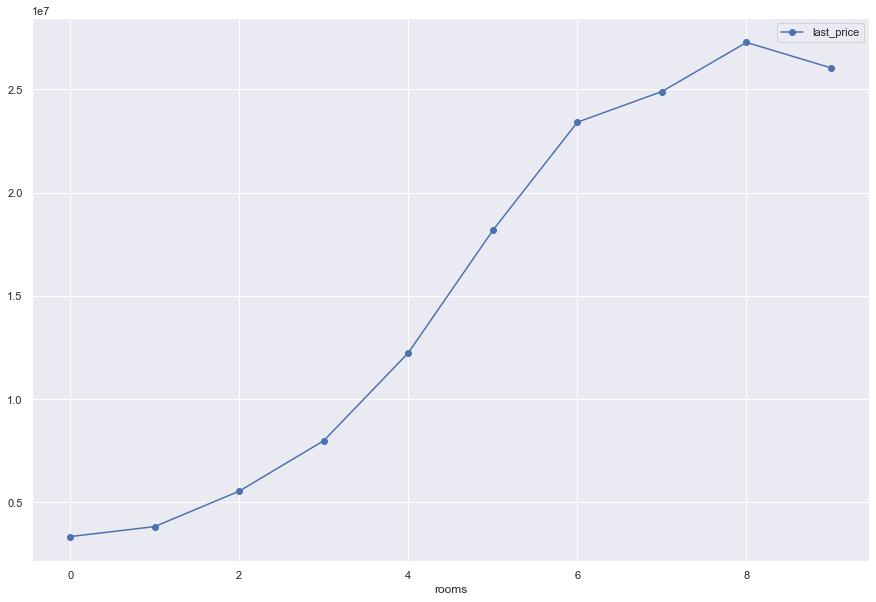

In [163]:
data.pivot_table(index='rooms', values=['last_price']).plot(style='o-')
plt.show()

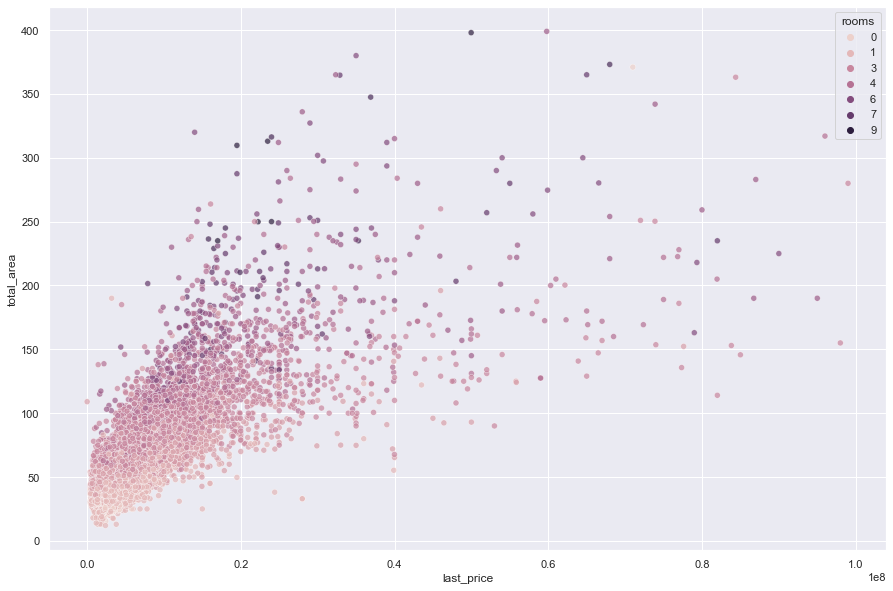

In [164]:
sns.scatterplot(data=data, x='last_price', y='total_area', alpha=0.7, hue='rooms')
plt.show()

Можно сказать, что с увеличением числа комнат растёт и стоимость квартир, однако, на втором графике хорошо видно, что увеличение числа комнат больше связано с увеличением общей площади и, как следствие, стоимости. 

* Этажа, на котором распооложена квартира

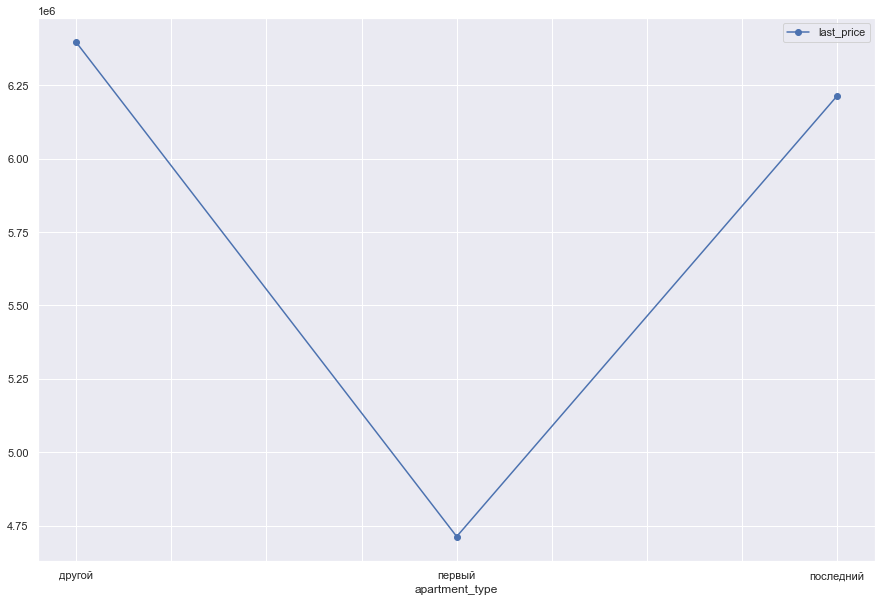

In [165]:
data.pivot_table(index='apartment_type', values=['last_price']).plot(style='o-')
plt.show()

Первые этажи меньше ценятся.

* Даты размещения (день недели, месяц, год)

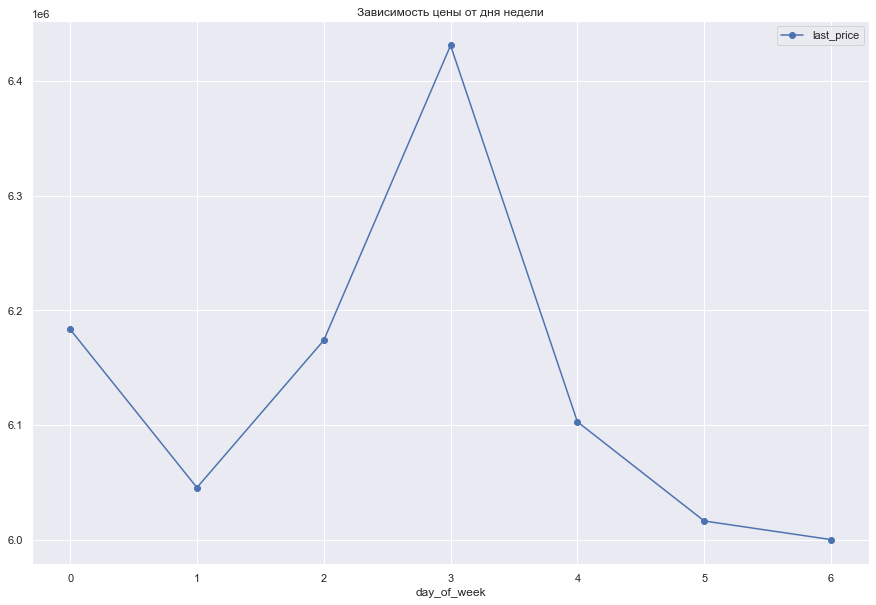

In [166]:
data.pivot_table(index='day_of_week', 
                 values=['last_price']).plot(style='o-', title='Зависимость цены от дня недели')
plt.show()

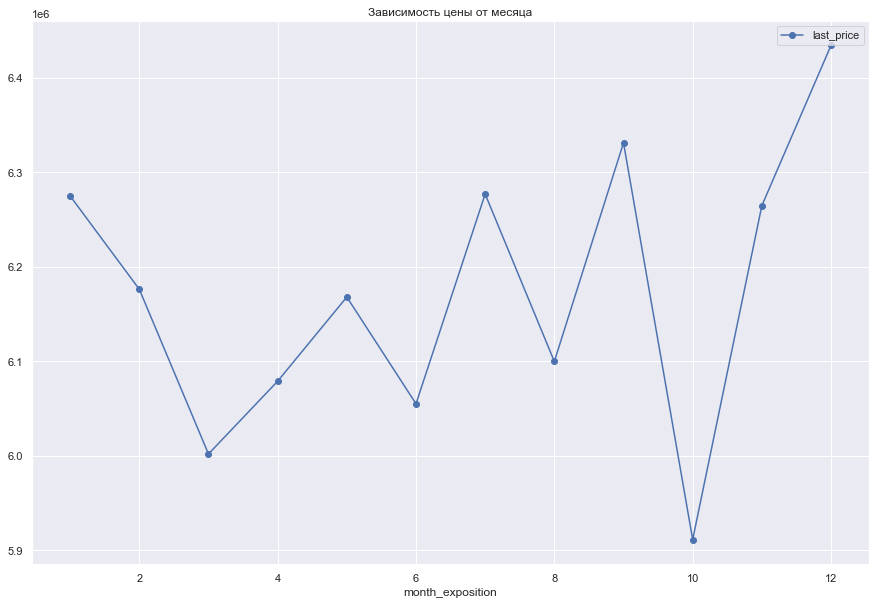

In [167]:
data.pivot_table(index='month_exposition', 
                 values=['last_price']).plot(style='o-', title='Зависимость цены от месяца')
plt.show()

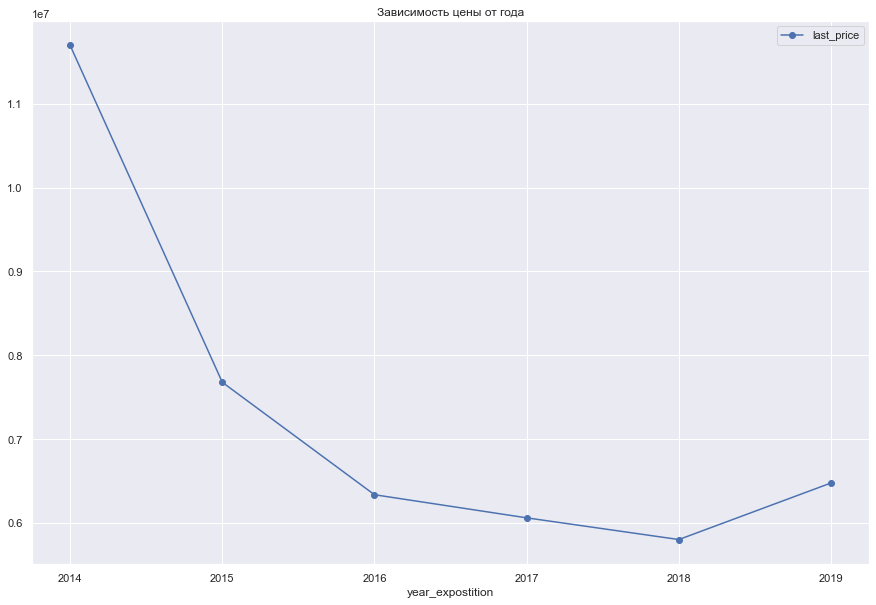

In [168]:
data.pivot_table(index='year_expostition', 
                 values=['last_price']).plot(style='o-', title='Зависимость цены от года')
plt.show()

Как и было видно на корреляционной тепловой карте, нет зависимости стоимости от временных показателей. В то же время годовой график показывает, что стоимость на недвижимость неуклонно падала до 2018 года, а затем начала расти.

#### Рассмотрим 10 населённых пунктов с наибольшим числом объявлений

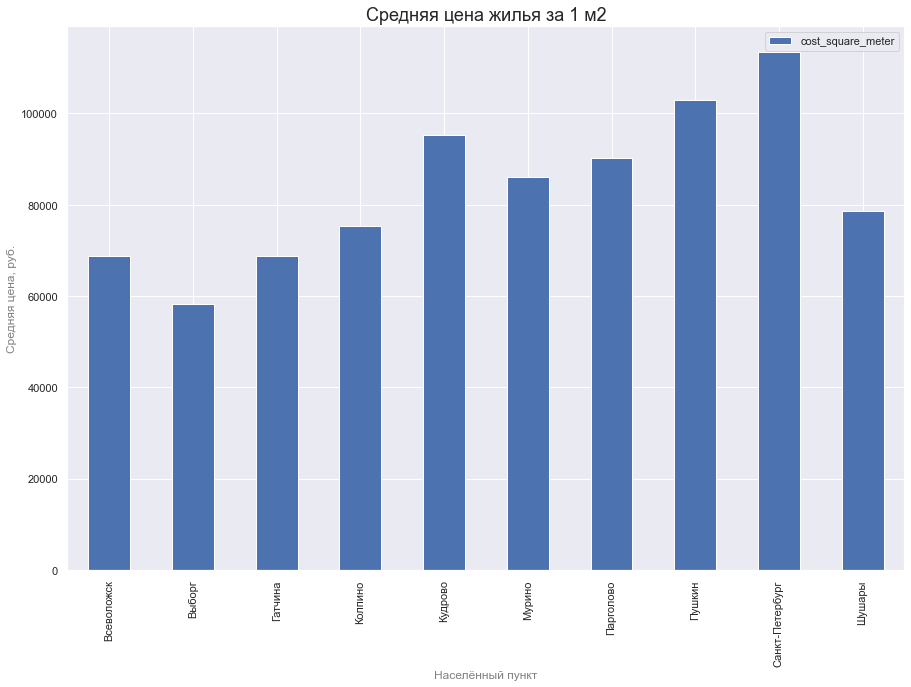

,cost_square_meter
locality_name,
Всеволожск,68654.473986
Выборг,58141.909153
Гатчина,68746.146763
Колпино,75424.579098
Кудрово,95324.930544
Мурино,86061.677014
Парголово,90175.913458
Пушкин,102900.024689
Санкт-Петербург,113394.404254


In [169]:
# создадим сводную таблицу средней стоимости одного квадратного метра
# в населённых пунктах с наибольшим количеством объявлений 
top10 = data.loc[data['locality_name']
        .isin(data['locality_name']
        .value_counts()[:10].index)] \
        .pivot_table(index='locality_name', values='cost_square_meter', aggfunc='mean')
# построим гистограмму на основе сводной таблицы        
top10.plot(kind='bar')
plt.title('Средняя цена жилья за 1 м2', fontsize=18)
plt.xlabel('Населённый пункт', color='gray')
plt.ylabel('Средняя цена, руб.', color='gray')
plt.show()
# выведем сводную таблицу
display(top10)

Самая высокая стоимость жилья, ожидаемо, в Санкт-Петербурге - 113'394 руб./м2. Самое же не дорогое жильё из популярных пригородов в городе Выборг - 58'142 руб./м2.

#### Расчитаем стоимость каждого километра в Санкт-Петербурге

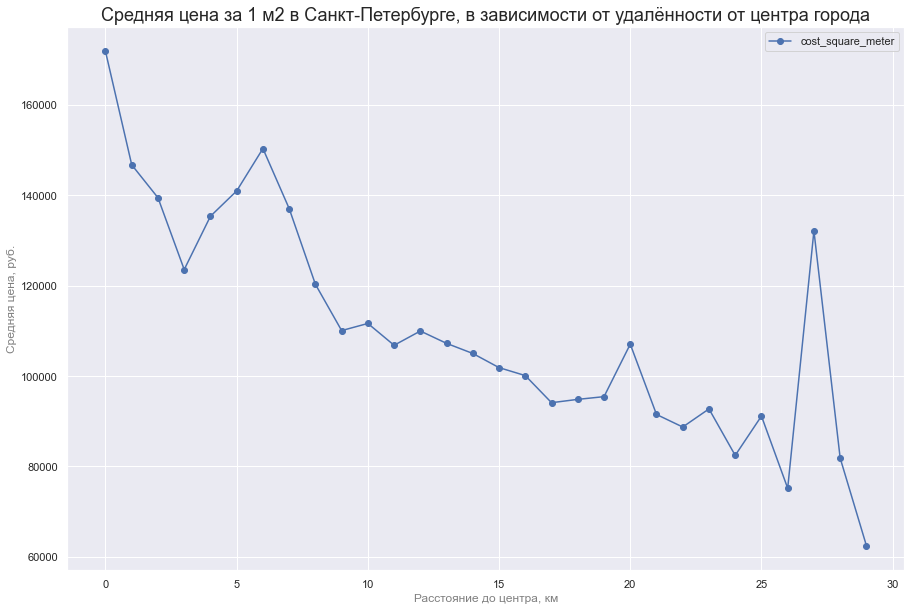

In [170]:
# создадим сводную таблицу для Санкт-Петербурга, в которой для каждого километра удаления от центра 
# расчитаем среднюю стоимость квадратного метра жилья
sp_city = data.loc[data['locality_name'] == 'Санкт-Петербург'] \
    .pivot_table(index='cityCenters_nearest_km', values='cost_square_meter', aggfunc='mean')
# выведем данные сводной таблицы sp_city на график
sp_city.plot(kind='line', style='o-')
plt.title('Средняя цена за 1 м2 в Санкт-Петербурге, в зависимости от удалённости от центра города', fontsize=18)
plt.xlabel('Расстояние до центра, км', color='gray')
plt.ylabel('Средняя цена, руб.', color='gray')
plt.show()

Безусловно, чем дальше от центра, тем ниже стоимость жилья. Но не всё так однозначно - как видно на графике есть некоторые значения, которые выбиваются из этой общей тенденции, возможно, в этих районах есть исторические достопримечательности или это просто престижный район.

### Общий вывод

Целью нашего исследования является подготовка и анализ реальных данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет для дальнейшего построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность.

В результате нашей работы была проведена предобработка исходных данных, в процессе которой были устранены пропущенные значения в столбцах, исправлены типы данных, изучены и исправлены аномалии и выбросы в данных.
Следующим шагом был проделан исследовательский анализ данных на зависимость параметров и их влияние на стоимость недвижимости.

Так мы выяснили, что основным фактором, влияющим на стоимость жилья является общая площадь, расчитали среднюю стоимость 1 м2 жилья для **Санкт-Петербурга**, она составила **113'394** *руб./м2* и девяти самых популярных населённых пунктов. Самым недорогим из пользующихся повышенным спросом населённых пунктов оказался город Выборг со стоимостью **58'142** *руб./м2*.

Кроме того, была исследована зависимость стоимости жилья от удалённости до центра города. Чем дальше от центра, тем дешевле жильё, однако, есть на некоторых удалениях от центра аномально высокая стоимость объектов. 

Так же интересным оказался город Мурино с населением 89'636 человек и аномально большим количеством объявлений - 2.5% от общего числа. В данном исследовании не ставилась цель исследование подобных аномалий, но они, безусловно, интересны.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод